# CASE STUDY: BREAST CANCER CLASSIFICATION
## Aamir Hussain

# STEP 1: PROBLEM STATEMENT


- Predicting if the cancer diagnosis is benign or malignant based on several observations/features 
- 30 features are used, examples:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

- Datasets are linearly separable using all 30 input features
- Number of Instances: 569
- Class Distribution: 212 Malignant, 357 Benign
- Target class:
         - Malignant
         - Benign


https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

<h3>Features are extracted based on several observations as per the properties of both class distributions:</h3>

<img src='https://scx1.b-cdn.net/csz/news/800/2015/newopticalme.jpg' >

# STEP 2: DATA IMPORTS AND PREPERATION

## Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(cancer['DESCR']) # Brief details about the data. Which gives a good insight about the data at hand.

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## Data Preperation

In [5]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target'])) 

In [6]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# STEP 3: DATA VISUALISATION (EDA)

In [7]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

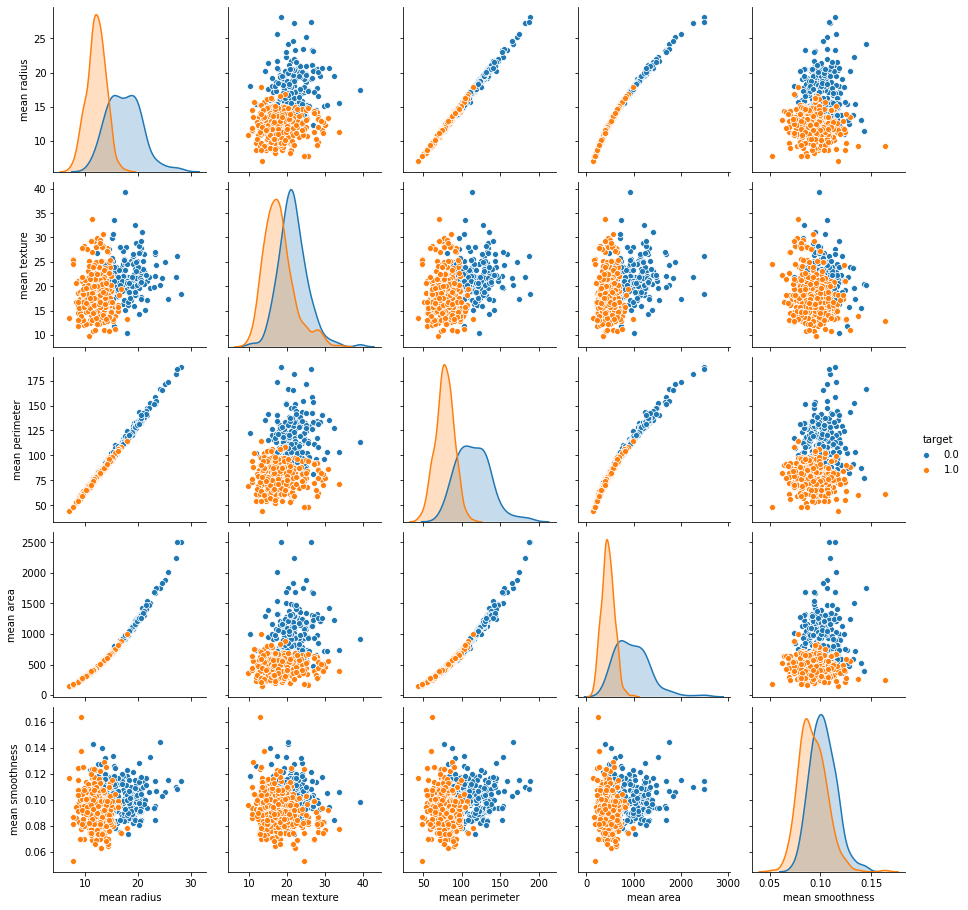

In [8]:
sns.pairplot(df_cancer, vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness'], hue='target')

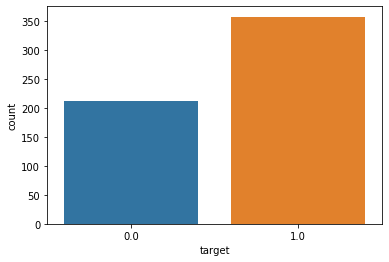

In [9]:
sns.countplot(df_cancer['target'])

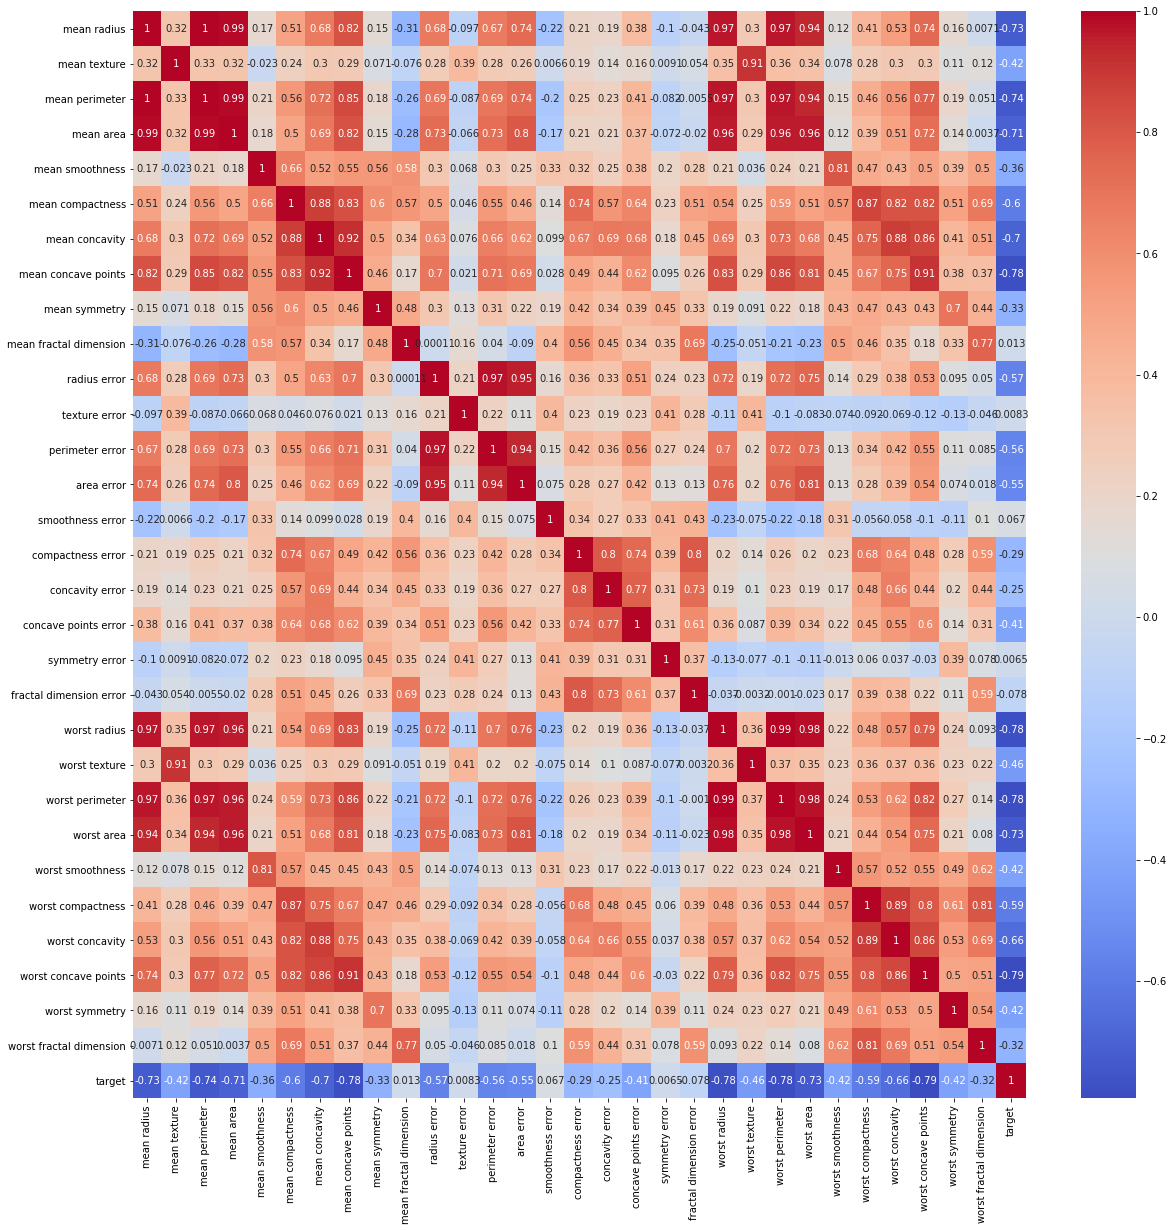

In [10]:
#Lets view the correlation between the features.
plt.figure(figsize=(20,20))
sns.heatmap(df_cancer.corr(), annot=True, cmap='coolwarm')

# STEP 4: MODEL CREATION

In [11]:
X = df_cancer.iloc[:, :-1].values
y = df_cancer.iloc[:, -1].values

print("X Shape : {}, \ny shape : {}".format(X.shape, y.shape))

X Shape : (569, 30), 
y shape : (569,)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## SVM

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

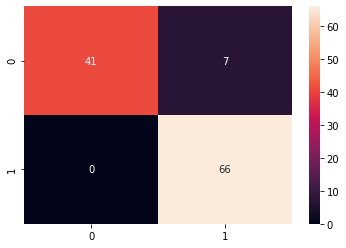

In [16]:
# Lets Visualise the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

<b> Our Support Vector Classifier misclassified 7 counts as Malignant, When the real result was Benign. We will try to use a boosting classifier called catboost which is known to be more powerful.</b>

## CatBoost

In [17]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier()

cb.fit(X_train, y_train)
cb_pred = cb.predict(X_test)

Learning rate set to 0.00736
0:	learn: 0.6813869	total: 65.4ms	remaining: 1m 5s
1:	learn: 0.6704322	total: 75.8ms	remaining: 37.8s
2:	learn: 0.6571722	total: 86.2ms	remaining: 28.6s
3:	learn: 0.6463150	total: 96.9ms	remaining: 24.1s
4:	learn: 0.6349414	total: 107ms	remaining: 21.3s
5:	learn: 0.6237679	total: 117ms	remaining: 19.4s
6:	learn: 0.6119997	total: 128ms	remaining: 18.1s
7:	learn: 0.6013959	total: 138ms	remaining: 17.1s
8:	learn: 0.5905084	total: 148ms	remaining: 16.3s
9:	learn: 0.5812584	total: 159ms	remaining: 15.7s
10:	learn: 0.5708768	total: 169ms	remaining: 15.2s
11:	learn: 0.5608510	total: 180ms	remaining: 14.8s
12:	learn: 0.5518382	total: 193ms	remaining: 14.6s
13:	learn: 0.5427286	total: 205ms	remaining: 14.4s
14:	learn: 0.5341933	total: 218ms	remaining: 14.3s
15:	learn: 0.5255692	total: 230ms	remaining: 14.1s
16:	learn: 0.5183159	total: 241ms	remaining: 13.9s
17:	learn: 0.5100457	total: 251ms	remaining: 13.7s
18:	learn: 0.5032641	total: 261ms	remaining: 13.5s
19:	lear

170:	learn: 0.0963418	total: 1.99s	remaining: 9.66s
171:	learn: 0.0956808	total: 2.01s	remaining: 9.66s
172:	learn: 0.0950290	total: 2.02s	remaining: 9.65s
173:	learn: 0.0944490	total: 2.03s	remaining: 9.64s
174:	learn: 0.0938951	total: 2.04s	remaining: 9.62s
175:	learn: 0.0931194	total: 2.05s	remaining: 9.6s
176:	learn: 0.0926750	total: 2.06s	remaining: 9.59s
177:	learn: 0.0919453	total: 2.07s	remaining: 9.57s
178:	learn: 0.0913808	total: 2.08s	remaining: 9.56s
179:	learn: 0.0906626	total: 2.1s	remaining: 9.54s
180:	learn: 0.0899840	total: 2.11s	remaining: 9.53s
181:	learn: 0.0894665	total: 2.12s	remaining: 9.52s
182:	learn: 0.0887621	total: 2.13s	remaining: 9.5s
183:	learn: 0.0881905	total: 2.14s	remaining: 9.49s
184:	learn: 0.0876423	total: 2.15s	remaining: 9.47s
185:	learn: 0.0870024	total: 2.16s	remaining: 9.46s
186:	learn: 0.0864615	total: 2.17s	remaining: 9.46s
187:	learn: 0.0859363	total: 2.19s	remaining: 9.45s
188:	learn: 0.0854680	total: 2.2s	remaining: 9.43s
189:	learn: 0.08

334:	learn: 0.0434673	total: 3.85s	remaining: 7.64s
335:	learn: 0.0432962	total: 3.86s	remaining: 7.64s
336:	learn: 0.0430831	total: 3.88s	remaining: 7.63s
337:	learn: 0.0428971	total: 3.89s	remaining: 7.62s
338:	learn: 0.0428084	total: 3.9s	remaining: 7.6s
339:	learn: 0.0426522	total: 3.91s	remaining: 7.59s
340:	learn: 0.0424669	total: 3.92s	remaining: 7.58s
341:	learn: 0.0423303	total: 3.93s	remaining: 7.57s
342:	learn: 0.0421043	total: 3.94s	remaining: 7.55s
343:	learn: 0.0420259	total: 3.95s	remaining: 7.54s
344:	learn: 0.0419092	total: 3.96s	remaining: 7.53s
345:	learn: 0.0417978	total: 3.98s	remaining: 7.51s
346:	learn: 0.0416952	total: 3.99s	remaining: 7.5s
347:	learn: 0.0415475	total: 4s	remaining: 7.49s
348:	learn: 0.0413925	total: 4.01s	remaining: 7.48s
349:	learn: 0.0412407	total: 4.02s	remaining: 7.47s
350:	learn: 0.0411040	total: 4.03s	remaining: 7.46s
351:	learn: 0.0409645	total: 4.05s	remaining: 7.45s
352:	learn: 0.0408014	total: 4.06s	remaining: 7.44s
353:	learn: 0.0407

495:	learn: 0.0269450	total: 5.68s	remaining: 5.77s
496:	learn: 0.0269120	total: 5.69s	remaining: 5.76s
497:	learn: 0.0268232	total: 5.71s	remaining: 5.75s
498:	learn: 0.0267533	total: 5.72s	remaining: 5.74s
499:	learn: 0.0266786	total: 5.73s	remaining: 5.73s
500:	learn: 0.0266167	total: 5.74s	remaining: 5.72s
501:	learn: 0.0265171	total: 5.75s	remaining: 5.7s
502:	learn: 0.0264445	total: 5.76s	remaining: 5.69s
503:	learn: 0.0263829	total: 5.77s	remaining: 5.68s
504:	learn: 0.0263051	total: 5.78s	remaining: 5.67s
505:	learn: 0.0262433	total: 5.79s	remaining: 5.66s
506:	learn: 0.0261567	total: 5.8s	remaining: 5.64s
507:	learn: 0.0260977	total: 5.82s	remaining: 5.63s
508:	learn: 0.0260379	total: 5.83s	remaining: 5.62s
509:	learn: 0.0259744	total: 5.84s	remaining: 5.61s
510:	learn: 0.0259234	total: 5.85s	remaining: 5.6s
511:	learn: 0.0258684	total: 5.86s	remaining: 5.59s
512:	learn: 0.0258054	total: 5.88s	remaining: 5.58s
513:	learn: 0.0257227	total: 5.89s	remaining: 5.57s
514:	learn: 0.0

658:	learn: 0.0187349	total: 7.53s	remaining: 3.9s
659:	learn: 0.0186808	total: 7.54s	remaining: 3.88s
660:	learn: 0.0186333	total: 7.55s	remaining: 3.87s
661:	learn: 0.0186212	total: 7.56s	remaining: 3.86s
662:	learn: 0.0185680	total: 7.58s	remaining: 3.85s
663:	learn: 0.0185267	total: 7.59s	remaining: 3.84s
664:	learn: 0.0184719	total: 7.6s	remaining: 3.83s
665:	learn: 0.0184335	total: 7.61s	remaining: 3.82s
666:	learn: 0.0183817	total: 7.62s	remaining: 3.8s
667:	learn: 0.0183375	total: 7.63s	remaining: 3.79s
668:	learn: 0.0183256	total: 7.64s	remaining: 3.78s
669:	learn: 0.0183034	total: 7.65s	remaining: 3.77s
670:	learn: 0.0182660	total: 7.66s	remaining: 3.76s
671:	learn: 0.0182370	total: 7.67s	remaining: 3.75s
672:	learn: 0.0181955	total: 7.68s	remaining: 3.73s
673:	learn: 0.0181449	total: 7.7s	remaining: 3.72s
674:	learn: 0.0181026	total: 7.71s	remaining: 3.71s
675:	learn: 0.0180576	total: 7.72s	remaining: 3.7s
676:	learn: 0.0180110	total: 7.73s	remaining: 3.69s
677:	learn: 0.017

820:	learn: 0.0141456	total: 9.35s	remaining: 2.04s
821:	learn: 0.0141230	total: 9.36s	remaining: 2.03s
822:	learn: 0.0140985	total: 9.37s	remaining: 2.02s
823:	learn: 0.0140613	total: 9.39s	remaining: 2s
824:	learn: 0.0140594	total: 9.4s	remaining: 1.99s
825:	learn: 0.0140317	total: 9.41s	remaining: 1.98s
826:	learn: 0.0139902	total: 9.42s	remaining: 1.97s
827:	learn: 0.0139860	total: 9.43s	remaining: 1.96s
828:	learn: 0.0139519	total: 9.44s	remaining: 1.95s
829:	learn: 0.0139168	total: 9.45s	remaining: 1.94s
830:	learn: 0.0138975	total: 9.46s	remaining: 1.92s
831:	learn: 0.0138694	total: 9.47s	remaining: 1.91s
832:	learn: 0.0138668	total: 9.48s	remaining: 1.9s
833:	learn: 0.0138490	total: 9.49s	remaining: 1.89s
834:	learn: 0.0138460	total: 9.51s	remaining: 1.88s
835:	learn: 0.0138062	total: 9.52s	remaining: 1.87s
836:	learn: 0.0138044	total: 9.52s	remaining: 1.85s
837:	learn: 0.0138004	total: 9.54s	remaining: 1.84s
838:	learn: 0.0137958	total: 9.55s	remaining: 1.83s
839:	learn: 0.013

983:	learn: 0.0116730	total: 11.2s	remaining: 182ms
984:	learn: 0.0116705	total: 11.2s	remaining: 171ms
985:	learn: 0.0116442	total: 11.2s	remaining: 159ms
986:	learn: 0.0116212	total: 11.2s	remaining: 148ms
987:	learn: 0.0116200	total: 11.2s	remaining: 136ms
988:	learn: 0.0115941	total: 11.2s	remaining: 125ms
989:	learn: 0.0115854	total: 11.3s	remaining: 114ms
990:	learn: 0.0115831	total: 11.3s	remaining: 102ms
991:	learn: 0.0115810	total: 11.3s	remaining: 91ms
992:	learn: 0.0115792	total: 11.3s	remaining: 79.6ms
993:	learn: 0.0115493	total: 11.3s	remaining: 68.2ms
994:	learn: 0.0115418	total: 11.3s	remaining: 56.8ms
995:	learn: 0.0115395	total: 11.3s	remaining: 45.5ms
996:	learn: 0.0115267	total: 11.3s	remaining: 34.1ms
997:	learn: 0.0115243	total: 11.3s	remaining: 22.7ms
998:	learn: 0.0115209	total: 11.4s	remaining: 11.4ms
999:	learn: 0.0115023	total: 11.4s	remaining: 0us


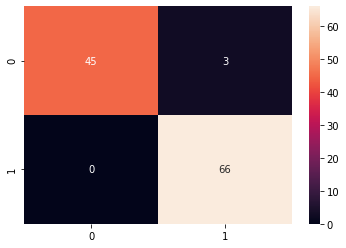

In [18]:
cm = confusion_matrix(y_test, cb_pred)
sns.heatmap(cm, annot=True)

<b> CatBoost Classifier misclassified 3 counts as Malignant, When the real result was Benign and we can conclude it in this phase but i want to see how our model performs after normalizing the data.</b>

# IMPROVING THE MODEL

## SVC TUNING
<ul>
    <li>Step 1: Applying Feature Scaling.</li>
    <li>Step 2: Tuning Hyperparameters within SVC using grid search.</li>
</ul>

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [20]:
#Normalization of features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

grid_search = GridSearchCV(classifier, param_grid=param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
grid_search.best_params_ #Best parameters found by the search

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [23]:
gs_pred = grid_search.predict(X_test)

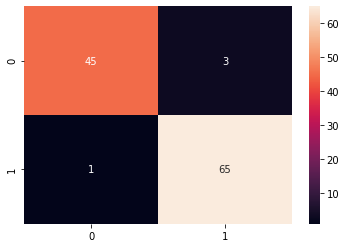

In [24]:
cm = confusion_matrix(y_test, gs_pred)
sns.heatmap(cm, annot=True)

<h4> Applying grid search did give us better results but gave us a Type-II error, which means that the model classified 1 count as Benign while it was Malignant, this type of error may turn out to be life threatning when applied to real world patients.</h4>

## CatBoost with Feature Scaling

In [25]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier()

cb.fit(X_train, y_train)
cb_scaled_pred = cb.predict(X_test)

Learning rate set to 0.00736
0:	learn: 0.6813869	total: 12.3ms	remaining: 12.3s
1:	learn: 0.6704322	total: 23.5ms	remaining: 11.7s
2:	learn: 0.6571722	total: 35.4ms	remaining: 11.8s
3:	learn: 0.6463150	total: 45.9ms	remaining: 11.4s
4:	learn: 0.6349414	total: 56ms	remaining: 11.1s
5:	learn: 0.6237679	total: 66.7ms	remaining: 11s
6:	learn: 0.6119997	total: 77ms	remaining: 10.9s
7:	learn: 0.6013959	total: 87.4ms	remaining: 10.8s
8:	learn: 0.5905084	total: 98.4ms	remaining: 10.8s
9:	learn: 0.5812584	total: 109ms	remaining: 10.8s
10:	learn: 0.5708768	total: 121ms	remaining: 10.8s
11:	learn: 0.5608510	total: 131ms	remaining: 10.8s
12:	learn: 0.5518382	total: 142ms	remaining: 10.8s
13:	learn: 0.5427286	total: 153ms	remaining: 10.8s
14:	learn: 0.5341933	total: 164ms	remaining: 10.7s
15:	learn: 0.5255692	total: 174ms	remaining: 10.7s
16:	learn: 0.5183159	total: 185ms	remaining: 10.7s
17:	learn: 0.5100457	total: 200ms	remaining: 10.9s
18:	learn: 0.5032641	total: 214ms	remaining: 11s
19:	learn: 

175:	learn: 0.0931194	total: 2.01s	remaining: 9.4s
176:	learn: 0.0926750	total: 2.02s	remaining: 9.4s
177:	learn: 0.0919453	total: 2.04s	remaining: 9.4s
178:	learn: 0.0913808	total: 2.05s	remaining: 9.39s
179:	learn: 0.0906626	total: 2.06s	remaining: 9.38s
180:	learn: 0.0899840	total: 2.07s	remaining: 9.36s
181:	learn: 0.0894665	total: 2.08s	remaining: 9.35s
182:	learn: 0.0887621	total: 2.09s	remaining: 9.34s
183:	learn: 0.0881905	total: 2.1s	remaining: 9.32s
184:	learn: 0.0876423	total: 2.11s	remaining: 9.31s
185:	learn: 0.0870024	total: 2.13s	remaining: 9.3s
186:	learn: 0.0864615	total: 2.13s	remaining: 9.29s
187:	learn: 0.0859363	total: 2.15s	remaining: 9.27s
188:	learn: 0.0854680	total: 2.16s	remaining: 9.26s
189:	learn: 0.0849952	total: 2.17s	remaining: 9.24s
190:	learn: 0.0844701	total: 2.18s	remaining: 9.23s
191:	learn: 0.0840492	total: 2.19s	remaining: 9.23s
192:	learn: 0.0836095	total: 2.21s	remaining: 9.22s
193:	learn: 0.0829925	total: 2.22s	remaining: 9.21s
194:	learn: 0.082

348:	learn: 0.0413925	total: 3.99s	remaining: 7.45s
349:	learn: 0.0412407	total: 4s	remaining: 7.44s
350:	learn: 0.0411040	total: 4.02s	remaining: 7.43s
351:	learn: 0.0409645	total: 4.03s	remaining: 7.42s
352:	learn: 0.0408014	total: 4.04s	remaining: 7.41s
353:	learn: 0.0407612	total: 4.05s	remaining: 7.39s
354:	learn: 0.0406234	total: 4.06s	remaining: 7.38s
355:	learn: 0.0404687	total: 4.07s	remaining: 7.37s
356:	learn: 0.0404119	total: 4.08s	remaining: 7.36s
357:	learn: 0.0403538	total: 4.09s	remaining: 7.34s
358:	learn: 0.0402237	total: 4.11s	remaining: 7.33s
359:	learn: 0.0401276	total: 4.12s	remaining: 7.32s
360:	learn: 0.0400174	total: 4.13s	remaining: 7.31s
361:	learn: 0.0398963	total: 4.14s	remaining: 7.29s
362:	learn: 0.0397932	total: 4.15s	remaining: 7.28s
363:	learn: 0.0396575	total: 4.16s	remaining: 7.27s
364:	learn: 0.0395374	total: 4.17s	remaining: 7.26s
365:	learn: 0.0394176	total: 4.18s	remaining: 7.25s
366:	learn: 0.0392907	total: 4.2s	remaining: 7.24s
367:	learn: 0.03

511:	learn: 0.0258684	total: 5.83s	remaining: 5.55s
512:	learn: 0.0258054	total: 5.84s	remaining: 5.54s
513:	learn: 0.0257227	total: 5.85s	remaining: 5.54s
514:	learn: 0.0256754	total: 5.87s	remaining: 5.52s
515:	learn: 0.0255768	total: 5.88s	remaining: 5.51s
516:	learn: 0.0255110	total: 5.89s	remaining: 5.5s
517:	learn: 0.0254209	total: 5.9s	remaining: 5.49s
518:	learn: 0.0253443	total: 5.91s	remaining: 5.48s
519:	learn: 0.0253065	total: 5.92s	remaining: 5.46s
520:	learn: 0.0252745	total: 5.93s	remaining: 5.45s
521:	learn: 0.0252168	total: 5.94s	remaining: 5.44s
522:	learn: 0.0251604	total: 5.95s	remaining: 5.43s
523:	learn: 0.0250875	total: 5.96s	remaining: 5.42s
524:	learn: 0.0250167	total: 5.97s	remaining: 5.41s
525:	learn: 0.0249183	total: 5.99s	remaining: 5.39s
526:	learn: 0.0248340	total: 6s	remaining: 5.38s
527:	learn: 0.0247382	total: 6.01s	remaining: 5.37s
528:	learn: 0.0246242	total: 6.02s	remaining: 5.36s
529:	learn: 0.0246162	total: 6.04s	remaining: 5.35s
530:	learn: 0.024

670:	learn: 0.0182660	total: 7.62s	remaining: 3.74s
671:	learn: 0.0182370	total: 7.63s	remaining: 3.73s
672:	learn: 0.0181955	total: 7.65s	remaining: 3.71s
673:	learn: 0.0181449	total: 7.66s	remaining: 3.7s
674:	learn: 0.0181026	total: 7.67s	remaining: 3.69s
675:	learn: 0.0180576	total: 7.68s	remaining: 3.68s
676:	learn: 0.0180110	total: 7.69s	remaining: 3.67s
677:	learn: 0.0179757	total: 7.7s	remaining: 3.66s
678:	learn: 0.0179258	total: 7.71s	remaining: 3.65s
679:	learn: 0.0179068	total: 7.72s	remaining: 3.63s
680:	learn: 0.0178903	total: 7.74s	remaining: 3.62s
681:	learn: 0.0178421	total: 7.75s	remaining: 3.61s
682:	learn: 0.0177987	total: 7.76s	remaining: 3.6s
683:	learn: 0.0177957	total: 7.77s	remaining: 3.59s
684:	learn: 0.0177617	total: 7.78s	remaining: 3.58s
685:	learn: 0.0177570	total: 7.79s	remaining: 3.56s
686:	learn: 0.0177271	total: 7.8s	remaining: 3.56s
687:	learn: 0.0177037	total: 7.82s	remaining: 3.54s
688:	learn: 0.0176594	total: 7.83s	remaining: 3.53s
689:	learn: 0.01

829:	learn: 0.0139168	total: 9.42s	remaining: 1.93s
830:	learn: 0.0138975	total: 9.44s	remaining: 1.92s
831:	learn: 0.0138694	total: 9.45s	remaining: 1.91s
832:	learn: 0.0138668	total: 9.46s	remaining: 1.9s
833:	learn: 0.0138490	total: 9.48s	remaining: 1.89s
834:	learn: 0.0138460	total: 9.49s	remaining: 1.88s
835:	learn: 0.0138062	total: 9.5s	remaining: 1.86s
836:	learn: 0.0138044	total: 9.51s	remaining: 1.85s
837:	learn: 0.0138004	total: 9.52s	remaining: 1.84s
838:	learn: 0.0137958	total: 9.53s	remaining: 1.83s
839:	learn: 0.0137657	total: 9.54s	remaining: 1.82s
840:	learn: 0.0137472	total: 9.56s	remaining: 1.81s
841:	learn: 0.0137472	total: 9.57s	remaining: 1.79s
842:	learn: 0.0136912	total: 9.58s	remaining: 1.78s
843:	learn: 0.0136811	total: 9.59s	remaining: 1.77s
844:	learn: 0.0136385	total: 9.61s	remaining: 1.76s
845:	learn: 0.0136359	total: 9.62s	remaining: 1.75s
846:	learn: 0.0136275	total: 9.63s	remaining: 1.74s
847:	learn: 0.0135984	total: 9.64s	remaining: 1.73s
848:	learn: 0.

990:	learn: 0.0115831	total: 11.3s	remaining: 102ms
991:	learn: 0.0115810	total: 11.3s	remaining: 91ms
992:	learn: 0.0115792	total: 11.3s	remaining: 79.6ms
993:	learn: 0.0115493	total: 11.3s	remaining: 68.2ms
994:	learn: 0.0115418	total: 11.3s	remaining: 56.9ms
995:	learn: 0.0115395	total: 11.3s	remaining: 45.5ms
996:	learn: 0.0115267	total: 11.3s	remaining: 34.1ms
997:	learn: 0.0115243	total: 11.3s	remaining: 22.7ms
998:	learn: 0.0115209	total: 11.4s	remaining: 11.4ms
999:	learn: 0.0115023	total: 11.4s	remaining: 0us


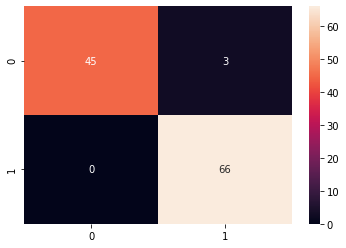

In [26]:
cm = confusion_matrix(y_test, cb_scaled_pred)
sns.heatmap(cm, annot=True)

<h4> This gave us a Type I error of 3 counts and is a very good result. We can now conclude that the CatBoosting gives us better results. We can further notice that the scaling used on CatBoost doesn't change the result as because of self tuning withing CatBoost algorithm which gives almost same results contrary to if Scaling is applied or not. </h4>

In [27]:
#Lets check the classification report of this model.
print(classification_report(y_test, cb_scaled_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        48
         1.0       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### As the last step lets apply cross-validation to further check the accuracy of our model. This makes sure if the model is overfitting.

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
accuracies = cross_val_score(estimator = cb, X = X_train, y = y_train, cv = 10)

Learning rate set to 0.007033
0:	learn: 0.6822631	total: 14.8ms	remaining: 14.8s
1:	learn: 0.6705059	total: 26.3ms	remaining: 13.1s
2:	learn: 0.6581394	total: 37.1ms	remaining: 12.3s
3:	learn: 0.6481468	total: 47.8ms	remaining: 11.9s
4:	learn: 0.6383663	total: 58.5ms	remaining: 11.6s
5:	learn: 0.6282421	total: 69.2ms	remaining: 11.5s
6:	learn: 0.6165053	total: 79.9ms	remaining: 11.3s
7:	learn: 0.6067663	total: 91.1ms	remaining: 11.3s
8:	learn: 0.5966666	total: 102ms	remaining: 11.3s
9:	learn: 0.5878207	total: 113ms	remaining: 11.2s
10:	learn: 0.5779418	total: 124ms	remaining: 11.1s
11:	learn: 0.5684625	total: 138ms	remaining: 11.4s
12:	learn: 0.5598037	total: 151ms	remaining: 11.5s
13:	learn: 0.5516420	total: 163ms	remaining: 11.5s
14:	learn: 0.5426640	total: 174ms	remaining: 11.4s
15:	learn: 0.5352117	total: 187ms	remaining: 11.5s
16:	learn: 0.5281375	total: 200ms	remaining: 11.6s
17:	learn: 0.5204650	total: 213ms	remaining: 11.6s
18:	learn: 0.5119139	total: 224ms	remaining: 11.6s
19:

165:	learn: 0.1112771	total: 2.02s	remaining: 10.1s
166:	learn: 0.1104216	total: 2.03s	remaining: 10.1s
167:	learn: 0.1096819	total: 2.04s	remaining: 10.1s
168:	learn: 0.1090225	total: 2.06s	remaining: 10.1s
169:	learn: 0.1081599	total: 2.07s	remaining: 10.1s
170:	learn: 0.1073627	total: 2.08s	remaining: 10.1s
171:	learn: 0.1064485	total: 2.09s	remaining: 10.1s
172:	learn: 0.1058735	total: 2.1s	remaining: 10s
173:	learn: 0.1052482	total: 2.11s	remaining: 10s
174:	learn: 0.1045064	total: 2.13s	remaining: 10s
175:	learn: 0.1037106	total: 2.14s	remaining: 10s
176:	learn: 0.1029378	total: 2.15s	remaining: 9.99s
177:	learn: 0.1022152	total: 2.16s	remaining: 9.97s
178:	learn: 0.1016305	total: 2.17s	remaining: 9.95s
179:	learn: 0.1008562	total: 2.18s	remaining: 9.94s
180:	learn: 0.1002310	total: 2.19s	remaining: 9.92s
181:	learn: 0.0995861	total: 2.21s	remaining: 9.91s
182:	learn: 0.0987230	total: 2.22s	remaining: 9.9s
183:	learn: 0.0981152	total: 2.23s	remaining: 9.88s
184:	learn: 0.0974894	

328:	learn: 0.0497258	total: 3.97s	remaining: 8.1s
329:	learn: 0.0495699	total: 3.99s	remaining: 8.09s
330:	learn: 0.0493880	total: 4s	remaining: 8.09s
331:	learn: 0.0491934	total: 4.01s	remaining: 8.07s
332:	learn: 0.0490366	total: 4.03s	remaining: 8.06s
333:	learn: 0.0488681	total: 4.04s	remaining: 8.05s
334:	learn: 0.0486873	total: 4.05s	remaining: 8.04s
335:	learn: 0.0485356	total: 4.06s	remaining: 8.03s
336:	learn: 0.0483441	total: 4.07s	remaining: 8.01s
337:	learn: 0.0482216	total: 4.08s	remaining: 8s
338:	learn: 0.0480710	total: 4.1s	remaining: 7.99s
339:	learn: 0.0478793	total: 4.11s	remaining: 7.97s
340:	learn: 0.0476760	total: 4.12s	remaining: 7.96s
341:	learn: 0.0474615	total: 4.13s	remaining: 7.95s
342:	learn: 0.0472515	total: 4.14s	remaining: 7.94s
343:	learn: 0.0470442	total: 4.16s	remaining: 7.92s
344:	learn: 0.0468430	total: 4.17s	remaining: 7.92s
345:	learn: 0.0466740	total: 4.19s	remaining: 7.91s
346:	learn: 0.0465286	total: 4.2s	remaining: 7.9s
347:	learn: 0.0463409	

498:	learn: 0.0297300	total: 5.97s	remaining: 5.99s
499:	learn: 0.0296415	total: 5.98s	remaining: 5.98s
500:	learn: 0.0296347	total: 6s	remaining: 5.97s
501:	learn: 0.0295366	total: 6.01s	remaining: 5.96s
502:	learn: 0.0295271	total: 6.02s	remaining: 5.95s
503:	learn: 0.0294819	total: 6.03s	remaining: 5.93s
504:	learn: 0.0293981	total: 6.04s	remaining: 5.92s
505:	learn: 0.0293224	total: 6.05s	remaining: 5.91s
506:	learn: 0.0292508	total: 6.06s	remaining: 5.89s
507:	learn: 0.0291894	total: 6.07s	remaining: 5.88s
508:	learn: 0.0291463	total: 6.08s	remaining: 5.87s
509:	learn: 0.0290711	total: 6.09s	remaining: 5.85s
510:	learn: 0.0290133	total: 6.1s	remaining: 5.84s
511:	learn: 0.0289584	total: 6.12s	remaining: 5.83s
512:	learn: 0.0288959	total: 6.13s	remaining: 5.82s
513:	learn: 0.0288153	total: 6.14s	remaining: 5.8s
514:	learn: 0.0287652	total: 6.15s	remaining: 5.79s
515:	learn: 0.0287385	total: 6.16s	remaining: 5.78s
516:	learn: 0.0286763	total: 6.17s	remaining: 5.77s
517:	learn: 0.028

661:	learn: 0.0209116	total: 7.8s	remaining: 3.98s
662:	learn: 0.0208549	total: 7.82s	remaining: 3.97s
663:	learn: 0.0208173	total: 7.83s	remaining: 3.96s
664:	learn: 0.0208008	total: 7.84s	remaining: 3.95s
665:	learn: 0.0207557	total: 7.85s	remaining: 3.94s
666:	learn: 0.0207202	total: 7.86s	remaining: 3.92s
667:	learn: 0.0206631	total: 7.87s	remaining: 3.91s
668:	learn: 0.0206349	total: 7.88s	remaining: 3.9s
669:	learn: 0.0205833	total: 7.89s	remaining: 3.89s
670:	learn: 0.0205452	total: 7.91s	remaining: 3.88s
671:	learn: 0.0204903	total: 7.92s	remaining: 3.86s
672:	learn: 0.0204757	total: 7.93s	remaining: 3.85s
673:	learn: 0.0204249	total: 7.94s	remaining: 3.84s
674:	learn: 0.0203815	total: 7.95s	remaining: 3.83s
675:	learn: 0.0203776	total: 7.96s	remaining: 3.81s
676:	learn: 0.0203576	total: 7.97s	remaining: 3.8s
677:	learn: 0.0203132	total: 7.98s	remaining: 3.79s
678:	learn: 0.0202606	total: 8s	remaining: 3.78s
679:	learn: 0.0202118	total: 8.01s	remaining: 3.77s
680:	learn: 0.0201

829:	learn: 0.0155333	total: 9.84s	remaining: 2.02s
830:	learn: 0.0154903	total: 9.85s	remaining: 2s
831:	learn: 0.0154595	total: 9.87s	remaining: 1.99s
832:	learn: 0.0154337	total: 9.88s	remaining: 1.98s
833:	learn: 0.0154062	total: 9.89s	remaining: 1.97s
834:	learn: 0.0154020	total: 9.9s	remaining: 1.96s
835:	learn: 0.0153984	total: 9.91s	remaining: 1.95s
836:	learn: 0.0153899	total: 9.93s	remaining: 1.93s
837:	learn: 0.0153545	total: 9.94s	remaining: 1.92s
838:	learn: 0.0153250	total: 9.95s	remaining: 1.91s
839:	learn: 0.0152978	total: 9.96s	remaining: 1.9s
840:	learn: 0.0152829	total: 9.98s	remaining: 1.89s
841:	learn: 0.0152590	total: 9.99s	remaining: 1.87s
842:	learn: 0.0152509	total: 10s	remaining: 1.86s
843:	learn: 0.0152498	total: 10s	remaining: 1.85s
844:	learn: 0.0152460	total: 10s	remaining: 1.84s
845:	learn: 0.0152408	total: 10s	remaining: 1.83s
846:	learn: 0.0152381	total: 10s	remaining: 1.81s
847:	learn: 0.0152155	total: 10.1s	remaining: 1.8s
848:	learn: 0.0151758	total:

994:	learn: 0.0130933	total: 11.8s	remaining: 59.3ms
995:	learn: 0.0130914	total: 11.8s	remaining: 47.5ms
996:	learn: 0.0130892	total: 11.8s	remaining: 35.6ms
997:	learn: 0.0130620	total: 11.8s	remaining: 23.7ms
998:	learn: 0.0130596	total: 11.9s	remaining: 11.9ms
999:	learn: 0.0130557	total: 11.9s	remaining: 0us
Learning rate set to 0.007033
0:	learn: 0.6811064	total: 11.8ms	remaining: 11.8s
1:	learn: 0.6708183	total: 22.4ms	remaining: 11.2s
2:	learn: 0.6590993	total: 33ms	remaining: 11s
3:	learn: 0.6490972	total: 44ms	remaining: 11s
4:	learn: 0.6379549	total: 58.5ms	remaining: 11.6s
5:	learn: 0.6279559	total: 70.3ms	remaining: 11.6s
6:	learn: 0.6168421	total: 80.9ms	remaining: 11.5s
7:	learn: 0.6064250	total: 91.9ms	remaining: 11.4s
8:	learn: 0.5961481	total: 103ms	remaining: 11.3s
9:	learn: 0.5878321	total: 114ms	remaining: 11.2s
10:	learn: 0.5780291	total: 124ms	remaining: 11.1s
11:	learn: 0.5686629	total: 135ms	remaining: 11.1s
12:	learn: 0.5605385	total: 146ms	remaining: 11.1s
13

160:	learn: 0.1149709	total: 1.92s	remaining: 10s
161:	learn: 0.1140597	total: 1.93s	remaining: 10s
162:	learn: 0.1132063	total: 1.95s	remaining: 10s
163:	learn: 0.1123579	total: 1.96s	remaining: 9.99s
164:	learn: 0.1116048	total: 1.97s	remaining: 9.97s
165:	learn: 0.1108040	total: 1.98s	remaining: 9.95s
166:	learn: 0.1101014	total: 1.99s	remaining: 9.93s
167:	learn: 0.1092044	total: 2s	remaining: 9.92s
168:	learn: 0.1085471	total: 2.01s	remaining: 9.9s
169:	learn: 0.1078041	total: 2.02s	remaining: 9.88s
170:	learn: 0.1070297	total: 2.04s	remaining: 9.87s
171:	learn: 0.1063139	total: 2.04s	remaining: 9.85s
172:	learn: 0.1056531	total: 2.06s	remaining: 9.83s
173:	learn: 0.1048965	total: 2.07s	remaining: 9.81s
174:	learn: 0.1043862	total: 2.08s	remaining: 9.79s
175:	learn: 0.1035649	total: 2.09s	remaining: 9.78s
176:	learn: 0.1029945	total: 2.1s	remaining: 9.76s
177:	learn: 0.1021809	total: 2.11s	remaining: 9.77s
178:	learn: 0.1015226	total: 2.13s	remaining: 9.76s
179:	learn: 0.1008666	t

333:	learn: 0.0482727	total: 3.96s	remaining: 7.89s
334:	learn: 0.0481496	total: 3.97s	remaining: 7.89s
335:	learn: 0.0479696	total: 3.99s	remaining: 7.88s
336:	learn: 0.0478265	total: 4s	remaining: 7.87s
337:	learn: 0.0477185	total: 4.01s	remaining: 7.86s
338:	learn: 0.0474624	total: 4.03s	remaining: 7.85s
339:	learn: 0.0472761	total: 4.04s	remaining: 7.84s
340:	learn: 0.0470818	total: 4.05s	remaining: 7.82s
341:	learn: 0.0468311	total: 4.06s	remaining: 7.81s
342:	learn: 0.0466699	total: 4.07s	remaining: 7.8s
343:	learn: 0.0464635	total: 4.08s	remaining: 7.79s
344:	learn: 0.0462875	total: 4.09s	remaining: 7.78s
345:	learn: 0.0460785	total: 4.11s	remaining: 7.76s
346:	learn: 0.0459905	total: 4.12s	remaining: 7.75s
347:	learn: 0.0457948	total: 4.13s	remaining: 7.74s
348:	learn: 0.0456624	total: 4.14s	remaining: 7.73s
349:	learn: 0.0455454	total: 4.16s	remaining: 7.72s
350:	learn: 0.0453408	total: 4.17s	remaining: 7.71s
351:	learn: 0.0452218	total: 4.18s	remaining: 7.7s
352:	learn: 0.045

499:	learn: 0.0290468	total: 5.98s	remaining: 5.98s
500:	learn: 0.0290069	total: 5.99s	remaining: 5.97s
501:	learn: 0.0289253	total: 6s	remaining: 5.96s
502:	learn: 0.0288692	total: 6.02s	remaining: 5.95s
503:	learn: 0.0288096	total: 6.03s	remaining: 5.93s
504:	learn: 0.0287194	total: 6.04s	remaining: 5.92s
505:	learn: 0.0286353	total: 6.05s	remaining: 5.91s
506:	learn: 0.0285976	total: 6.07s	remaining: 5.9s
507:	learn: 0.0285291	total: 6.08s	remaining: 5.88s
508:	learn: 0.0284958	total: 6.09s	remaining: 5.87s
509:	learn: 0.0283993	total: 6.1s	remaining: 5.86s
510:	learn: 0.0283153	total: 6.11s	remaining: 5.85s
511:	learn: 0.0282402	total: 6.12s	remaining: 5.84s
512:	learn: 0.0281418	total: 6.13s	remaining: 5.82s
513:	learn: 0.0280758	total: 6.15s	remaining: 5.82s
514:	learn: 0.0279644	total: 6.16s	remaining: 5.8s
515:	learn: 0.0279171	total: 6.18s	remaining: 5.79s
516:	learn: 0.0278507	total: 6.19s	remaining: 5.78s
517:	learn: 0.0277557	total: 6.2s	remaining: 5.77s
518:	learn: 0.02766

668:	learn: 0.0200383	total: 7.99s	remaining: 3.95s
669:	learn: 0.0199925	total: 8.01s	remaining: 3.94s
670:	learn: 0.0199455	total: 8.02s	remaining: 3.93s
671:	learn: 0.0199420	total: 8.03s	remaining: 3.92s
672:	learn: 0.0198989	total: 8.04s	remaining: 3.91s
673:	learn: 0.0198560	total: 8.06s	remaining: 3.9s
674:	learn: 0.0198339	total: 8.07s	remaining: 3.88s
675:	learn: 0.0198153	total: 8.08s	remaining: 3.87s
676:	learn: 0.0197789	total: 8.09s	remaining: 3.86s
677:	learn: 0.0197412	total: 8.1s	remaining: 3.85s
678:	learn: 0.0197372	total: 8.12s	remaining: 3.84s
679:	learn: 0.0196746	total: 8.13s	remaining: 3.82s
680:	learn: 0.0196042	total: 8.14s	remaining: 3.81s
681:	learn: 0.0195671	total: 8.15s	remaining: 3.8s
682:	learn: 0.0195233	total: 8.17s	remaining: 3.79s
683:	learn: 0.0194515	total: 8.18s	remaining: 3.78s
684:	learn: 0.0194093	total: 8.19s	remaining: 3.77s
685:	learn: 0.0193579	total: 8.21s	remaining: 3.75s
686:	learn: 0.0193076	total: 8.22s	remaining: 3.74s
687:	learn: 0.0

830:	learn: 0.0150392	total: 9.96s	remaining: 2.03s
831:	learn: 0.0149980	total: 9.98s	remaining: 2.02s
832:	learn: 0.0149629	total: 9.99s	remaining: 2s
833:	learn: 0.0149461	total: 10s	remaining: 1.99s
834:	learn: 0.0149172	total: 10s	remaining: 1.98s
835:	learn: 0.0148733	total: 10s	remaining: 1.97s
836:	learn: 0.0148676	total: 10s	remaining: 1.96s
837:	learn: 0.0148339	total: 10.1s	remaining: 1.94s
838:	learn: 0.0148314	total: 10.1s	remaining: 1.93s
839:	learn: 0.0148282	total: 10.1s	remaining: 1.92s
840:	learn: 0.0148109	total: 10.1s	remaining: 1.91s
841:	learn: 0.0147888	total: 10.1s	remaining: 1.9s
842:	learn: 0.0147710	total: 10.1s	remaining: 1.88s
843:	learn: 0.0147565	total: 10.1s	remaining: 1.87s
844:	learn: 0.0147164	total: 10.1s	remaining: 1.86s
845:	learn: 0.0146870	total: 10.2s	remaining: 1.85s
846:	learn: 0.0146434	total: 10.2s	remaining: 1.83s
847:	learn: 0.0146359	total: 10.2s	remaining: 1.82s
848:	learn: 0.0146104	total: 10.2s	remaining: 1.81s
849:	learn: 0.0146074	to

998:	learn: 0.0122319	total: 12s	remaining: 12ms
999:	learn: 0.0122181	total: 12s	remaining: 0us
Learning rate set to 0.007033
0:	learn: 0.6820396	total: 13.1ms	remaining: 13s
1:	learn: 0.6701938	total: 25ms	remaining: 12.4s
2:	learn: 0.6589950	total: 36.3ms	remaining: 12.1s
3:	learn: 0.6488526	total: 48.1ms	remaining: 12s
4:	learn: 0.6370511	total: 59.3ms	remaining: 11.8s
5:	learn: 0.6270836	total: 70.9ms	remaining: 11.8s
6:	learn: 0.6164613	total: 82.6ms	remaining: 11.7s
7:	learn: 0.6053837	total: 97ms	remaining: 12s
8:	learn: 0.5947232	total: 111ms	remaining: 12.2s
9:	learn: 0.5857804	total: 123ms	remaining: 12.2s
10:	learn: 0.5761717	total: 135ms	remaining: 12.2s
11:	learn: 0.5663321	total: 147ms	remaining: 12.1s
12:	learn: 0.5579405	total: 159ms	remaining: 12.1s
13:	learn: 0.5484513	total: 172ms	remaining: 12.1s
14:	learn: 0.5400368	total: 183ms	remaining: 12s
15:	learn: 0.5320771	total: 195ms	remaining: 12s
16:	learn: 0.5252038	total: 207ms	remaining: 12s
17:	learn: 0.5172634	tot

171:	learn: 0.1005404	total: 2.1s	remaining: 10.1s
172:	learn: 0.0998671	total: 2.12s	remaining: 10.1s
173:	learn: 0.0991411	total: 2.13s	remaining: 10.1s
174:	learn: 0.0984656	total: 2.15s	remaining: 10.1s
175:	learn: 0.0977846	total: 2.16s	remaining: 10.1s
176:	learn: 0.0971833	total: 2.17s	remaining: 10.1s
177:	learn: 0.0964755	total: 2.18s	remaining: 10.1s
178:	learn: 0.0957517	total: 2.19s	remaining: 10.1s
179:	learn: 0.0950905	total: 2.2s	remaining: 10s
180:	learn: 0.0944466	total: 2.21s	remaining: 10s
181:	learn: 0.0937037	total: 2.23s	remaining: 10s
182:	learn: 0.0932936	total: 2.24s	remaining: 9.99s
183:	learn: 0.0925490	total: 2.25s	remaining: 9.97s
184:	learn: 0.0920298	total: 2.26s	remaining: 9.96s
185:	learn: 0.0916758	total: 2.27s	remaining: 9.94s
186:	learn: 0.0909275	total: 2.28s	remaining: 9.93s
187:	learn: 0.0904354	total: 2.3s	remaining: 9.93s
188:	learn: 0.0898758	total: 2.31s	remaining: 9.92s
189:	learn: 0.0892984	total: 2.32s	remaining: 9.91s
190:	learn: 0.0888333

335:	learn: 0.0438110	total: 4.1s	remaining: 8.11s
336:	learn: 0.0436529	total: 4.12s	remaining: 8.1s
337:	learn: 0.0435094	total: 4.13s	remaining: 8.09s
338:	learn: 0.0433560	total: 4.14s	remaining: 8.08s
339:	learn: 0.0431650	total: 4.15s	remaining: 8.06s
340:	learn: 0.0429839	total: 4.17s	remaining: 8.05s
341:	learn: 0.0428048	total: 4.18s	remaining: 8.04s
342:	learn: 0.0426420	total: 4.19s	remaining: 8.02s
343:	learn: 0.0424457	total: 4.2s	remaining: 8.01s
344:	learn: 0.0422568	total: 4.21s	remaining: 8s
345:	learn: 0.0421321	total: 4.22s	remaining: 7.98s
346:	learn: 0.0419736	total: 4.23s	remaining: 7.97s
347:	learn: 0.0418443	total: 4.25s	remaining: 7.96s
348:	learn: 0.0417074	total: 4.26s	remaining: 7.94s
349:	learn: 0.0414886	total: 4.27s	remaining: 7.93s
350:	learn: 0.0413212	total: 4.28s	remaining: 7.92s
351:	learn: 0.0411971	total: 4.3s	remaining: 7.91s
352:	learn: 0.0410437	total: 4.31s	remaining: 7.9s
353:	learn: 0.0409375	total: 4.32s	remaining: 7.88s
354:	learn: 0.040764

500:	learn: 0.0256731	total: 6.1s	remaining: 6.08s
501:	learn: 0.0255929	total: 6.12s	remaining: 6.07s
502:	learn: 0.0255319	total: 6.13s	remaining: 6.06s
503:	learn: 0.0254560	total: 6.14s	remaining: 6.04s
504:	learn: 0.0253755	total: 6.15s	remaining: 6.03s
505:	learn: 0.0253163	total: 6.17s	remaining: 6.02s
506:	learn: 0.0252376	total: 6.18s	remaining: 6.01s
507:	learn: 0.0251358	total: 6.19s	remaining: 5.99s
508:	learn: 0.0250766	total: 6.2s	remaining: 5.98s
509:	learn: 0.0250151	total: 6.21s	remaining: 5.97s
510:	learn: 0.0249650	total: 6.22s	remaining: 5.96s
511:	learn: 0.0248848	total: 6.24s	remaining: 5.94s
512:	learn: 0.0248069	total: 6.25s	remaining: 5.93s
513:	learn: 0.0247459	total: 6.26s	remaining: 5.92s
514:	learn: 0.0246844	total: 6.27s	remaining: 5.91s
515:	learn: 0.0246279	total: 6.29s	remaining: 5.89s
516:	learn: 0.0245569	total: 6.3s	remaining: 5.88s
517:	learn: 0.0245018	total: 6.31s	remaining: 5.87s
518:	learn: 0.0244379	total: 6.32s	remaining: 5.86s
519:	learn: 0.0

665:	learn: 0.0169812	total: 8.11s	remaining: 4.07s
666:	learn: 0.0169490	total: 8.13s	remaining: 4.06s
667:	learn: 0.0169080	total: 8.14s	remaining: 4.05s
668:	learn: 0.0168668	total: 8.15s	remaining: 4.03s
669:	learn: 0.0168545	total: 8.16s	remaining: 4.02s
670:	learn: 0.0168040	total: 8.18s	remaining: 4.01s
671:	learn: 0.0167744	total: 8.19s	remaining: 4s
672:	learn: 0.0167413	total: 8.2s	remaining: 3.98s
673:	learn: 0.0166960	total: 8.21s	remaining: 3.97s
674:	learn: 0.0166632	total: 8.22s	remaining: 3.96s
675:	learn: 0.0166370	total: 8.24s	remaining: 3.95s
676:	learn: 0.0165981	total: 8.25s	remaining: 3.94s
677:	learn: 0.0165702	total: 8.26s	remaining: 3.92s
678:	learn: 0.0165341	total: 8.27s	remaining: 3.91s
679:	learn: 0.0165074	total: 8.28s	remaining: 3.9s
680:	learn: 0.0164597	total: 8.3s	remaining: 3.89s
681:	learn: 0.0164180	total: 8.31s	remaining: 3.88s
682:	learn: 0.0163929	total: 8.32s	remaining: 3.86s
683:	learn: 0.0163744	total: 8.34s	remaining: 3.85s
684:	learn: 0.0163

830:	learn: 0.0120859	total: 10.1s	remaining: 2.06s
831:	learn: 0.0120666	total: 10.1s	remaining: 2.05s
832:	learn: 0.0120458	total: 10.2s	remaining: 2.04s
833:	learn: 0.0120182	total: 10.2s	remaining: 2.02s
834:	learn: 0.0119890	total: 10.2s	remaining: 2.01s
835:	learn: 0.0119713	total: 10.2s	remaining: 2s
836:	learn: 0.0119404	total: 10.2s	remaining: 1.99s
837:	learn: 0.0119286	total: 10.2s	remaining: 1.97s
838:	learn: 0.0119031	total: 10.2s	remaining: 1.96s
839:	learn: 0.0118817	total: 10.2s	remaining: 1.95s
840:	learn: 0.0118365	total: 10.3s	remaining: 1.94s
841:	learn: 0.0118082	total: 10.3s	remaining: 1.93s
842:	learn: 0.0118036	total: 10.3s	remaining: 1.91s
843:	learn: 0.0117782	total: 10.3s	remaining: 1.9s
844:	learn: 0.0117575	total: 10.3s	remaining: 1.89s
845:	learn: 0.0117480	total: 10.3s	remaining: 1.88s
846:	learn: 0.0117313	total: 10.3s	remaining: 1.86s
847:	learn: 0.0117065	total: 10.3s	remaining: 1.85s
848:	learn: 0.0116920	total: 10.3s	remaining: 1.84s
849:	learn: 0.01

998:	learn: 0.0091794	total: 12.2s	remaining: 12.2ms
999:	learn: 0.0091628	total: 12.2s	remaining: 0us
Learning rate set to 0.007033
0:	learn: 0.6823165	total: 12.5ms	remaining: 12.5s
1:	learn: 0.6713448	total: 23.6ms	remaining: 11.8s
2:	learn: 0.6604968	total: 34ms	remaining: 11.3s
3:	learn: 0.6503533	total: 44.5ms	remaining: 11.1s
4:	learn: 0.6390787	total: 55.3ms	remaining: 11s
5:	learn: 0.6288501	total: 66.1ms	remaining: 10.9s
6:	learn: 0.6173592	total: 76.7ms	remaining: 10.9s
7:	learn: 0.6061223	total: 90ms	remaining: 11.2s
8:	learn: 0.5938113	total: 103ms	remaining: 11.3s
9:	learn: 0.5847583	total: 114ms	remaining: 11.3s
10:	learn: 0.5760168	total: 125ms	remaining: 11.2s
11:	learn: 0.5671652	total: 135ms	remaining: 11.2s
12:	learn: 0.5585872	total: 146ms	remaining: 11.1s
13:	learn: 0.5502634	total: 157ms	remaining: 11.1s
14:	learn: 0.5431956	total: 168ms	remaining: 11s
15:	learn: 0.5353202	total: 179ms	remaining: 11s
16:	learn: 0.5288339	total: 189ms	remaining: 11s
17:	learn: 0.5

161:	learn: 0.1136509	total: 1.93s	remaining: 9.97s
162:	learn: 0.1129187	total: 1.94s	remaining: 9.97s
163:	learn: 0.1119856	total: 1.96s	remaining: 9.97s
164:	learn: 0.1110300	total: 1.97s	remaining: 9.96s
165:	learn: 0.1102607	total: 1.98s	remaining: 9.95s
166:	learn: 0.1096357	total: 1.99s	remaining: 9.93s
167:	learn: 0.1090093	total: 2s	remaining: 9.92s
168:	learn: 0.1083560	total: 2.01s	remaining: 9.91s
169:	learn: 0.1075204	total: 2.03s	remaining: 9.89s
170:	learn: 0.1069439	total: 2.04s	remaining: 9.88s
171:	learn: 0.1063401	total: 2.05s	remaining: 9.87s
172:	learn: 0.1056576	total: 2.06s	remaining: 9.86s
173:	learn: 0.1051194	total: 2.07s	remaining: 9.85s
174:	learn: 0.1043732	total: 2.08s	remaining: 9.83s
175:	learn: 0.1036836	total: 2.1s	remaining: 9.82s
176:	learn: 0.1030628	total: 2.11s	remaining: 9.82s
177:	learn: 0.1022517	total: 2.13s	remaining: 9.82s
178:	learn: 0.1015955	total: 2.14s	remaining: 9.81s
179:	learn: 0.1009682	total: 2.15s	remaining: 9.8s
180:	learn: 0.100

327:	learn: 0.0497933	total: 3.96s	remaining: 8.1s
328:	learn: 0.0496211	total: 3.97s	remaining: 8.1s
329:	learn: 0.0494275	total: 3.98s	remaining: 8.09s
330:	learn: 0.0492310	total: 4s	remaining: 8.08s
331:	learn: 0.0490840	total: 4.01s	remaining: 8.07s
332:	learn: 0.0488580	total: 4.02s	remaining: 8.05s
333:	learn: 0.0486895	total: 4.03s	remaining: 8.04s
334:	learn: 0.0484885	total: 4.04s	remaining: 8.03s
335:	learn: 0.0483476	total: 4.06s	remaining: 8.02s
336:	learn: 0.0482438	total: 4.07s	remaining: 8s
337:	learn: 0.0480395	total: 4.08s	remaining: 7.99s
338:	learn: 0.0478808	total: 4.09s	remaining: 7.98s
339:	learn: 0.0477008	total: 4.1s	remaining: 7.96s
340:	learn: 0.0475203	total: 4.11s	remaining: 7.95s
341:	learn: 0.0474379	total: 4.13s	remaining: 7.94s
342:	learn: 0.0472922	total: 4.14s	remaining: 7.93s
343:	learn: 0.0471205	total: 4.15s	remaining: 7.92s
344:	learn: 0.0470068	total: 4.17s	remaining: 7.91s
345:	learn: 0.0467957	total: 4.18s	remaining: 7.9s
346:	learn: 0.0466831	

493:	learn: 0.0299840	total: 5.97s	remaining: 6.11s
494:	learn: 0.0299175	total: 5.98s	remaining: 6.1s
495:	learn: 0.0298432	total: 6s	remaining: 6.09s
496:	learn: 0.0297870	total: 6.01s	remaining: 6.08s
497:	learn: 0.0296821	total: 6.02s	remaining: 6.07s
498:	learn: 0.0296014	total: 6.03s	remaining: 6.06s
499:	learn: 0.0295518	total: 6.04s	remaining: 6.04s
500:	learn: 0.0295271	total: 6.06s	remaining: 6.03s
501:	learn: 0.0293989	total: 6.07s	remaining: 6.02s
502:	learn: 0.0293347	total: 6.08s	remaining: 6.01s
503:	learn: 0.0291898	total: 6.09s	remaining: 6s
504:	learn: 0.0291089	total: 6.1s	remaining: 5.98s
505:	learn: 0.0290157	total: 6.12s	remaining: 5.97s
506:	learn: 0.0289431	total: 6.13s	remaining: 5.96s
507:	learn: 0.0288798	total: 6.14s	remaining: 5.95s
508:	learn: 0.0288385	total: 6.15s	remaining: 5.94s
509:	learn: 0.0287607	total: 6.17s	remaining: 5.93s
510:	learn: 0.0287116	total: 6.18s	remaining: 5.91s
511:	learn: 0.0286523	total: 6.19s	remaining: 5.9s
512:	learn: 0.0285621

657:	learn: 0.0209272	total: 7.97s	remaining: 4.14s
658:	learn: 0.0208648	total: 7.99s	remaining: 4.13s
659:	learn: 0.0208129	total: 8s	remaining: 4.12s
660:	learn: 0.0207999	total: 8.01s	remaining: 4.11s
661:	learn: 0.0207429	total: 8.02s	remaining: 4.09s
662:	learn: 0.0206916	total: 8.03s	remaining: 4.08s
663:	learn: 0.0206288	total: 8.05s	remaining: 4.07s
664:	learn: 0.0205849	total: 8.06s	remaining: 4.06s
665:	learn: 0.0205354	total: 8.07s	remaining: 4.05s
666:	learn: 0.0204899	total: 8.08s	remaining: 4.03s
667:	learn: 0.0204631	total: 8.09s	remaining: 4.02s
668:	learn: 0.0204519	total: 8.1s	remaining: 4.01s
669:	learn: 0.0204036	total: 8.12s	remaining: 4s
670:	learn: 0.0203547	total: 8.13s	remaining: 3.98s
671:	learn: 0.0203034	total: 8.14s	remaining: 3.97s
672:	learn: 0.0202656	total: 8.16s	remaining: 3.96s
673:	learn: 0.0202210	total: 8.17s	remaining: 3.95s
674:	learn: 0.0201828	total: 8.18s	remaining: 3.94s
675:	learn: 0.0201431	total: 8.19s	remaining: 3.93s
676:	learn: 0.02011

822:	learn: 0.0162315	total: 9.99s	remaining: 2.15s
823:	learn: 0.0162051	total: 10s	remaining: 2.14s
824:	learn: 0.0161604	total: 10s	remaining: 2.13s
825:	learn: 0.0161405	total: 10s	remaining: 2.11s
826:	learn: 0.0161090	total: 10s	remaining: 2.1s
827:	learn: 0.0160874	total: 10.1s	remaining: 2.09s
828:	learn: 0.0160837	total: 10.1s	remaining: 2.08s
829:	learn: 0.0160462	total: 10.1s	remaining: 2.06s
830:	learn: 0.0160189	total: 10.1s	remaining: 2.05s
831:	learn: 0.0159898	total: 10.1s	remaining: 2.04s
832:	learn: 0.0159685	total: 10.1s	remaining: 2.03s
833:	learn: 0.0159303	total: 10.1s	remaining: 2.01s
834:	learn: 0.0158964	total: 10.1s	remaining: 2s
835:	learn: 0.0158458	total: 10.1s	remaining: 1.99s
836:	learn: 0.0158417	total: 10.2s	remaining: 1.98s
837:	learn: 0.0158077	total: 10.2s	remaining: 1.97s
838:	learn: 0.0158017	total: 10.2s	remaining: 1.95s
839:	learn: 0.0157829	total: 10.2s	remaining: 1.94s
840:	learn: 0.0157461	total: 10.2s	remaining: 1.93s
841:	learn: 0.0157187	to

986:	learn: 0.0131898	total: 12s	remaining: 158ms
987:	learn: 0.0131880	total: 12s	remaining: 146ms
988:	learn: 0.0131510	total: 12s	remaining: 134ms
989:	learn: 0.0131238	total: 12s	remaining: 122ms
990:	learn: 0.0131210	total: 12.1s	remaining: 109ms
991:	learn: 0.0131187	total: 12.1s	remaining: 97.3ms
992:	learn: 0.0130883	total: 12.1s	remaining: 85.1ms
993:	learn: 0.0130856	total: 12.1s	remaining: 73ms
994:	learn: 0.0130828	total: 12.1s	remaining: 60.8ms
995:	learn: 0.0130811	total: 12.1s	remaining: 48.6ms
996:	learn: 0.0130786	total: 12.1s	remaining: 36.5ms
997:	learn: 0.0130757	total: 12.1s	remaining: 24.3ms
998:	learn: 0.0130736	total: 12.1s	remaining: 12.2ms
999:	learn: 0.0130602	total: 12.2s	remaining: 0us
Learning rate set to 0.007033
0:	learn: 0.6823187	total: 12.6ms	remaining: 12.6s
1:	learn: 0.6714432	total: 23.5ms	remaining: 11.7s
2:	learn: 0.6595434	total: 34.2ms	remaining: 11.4s
3:	learn: 0.6495666	total: 45ms	remaining: 11.2s
4:	learn: 0.6373274	total: 55.7ms	remaining:

149:	learn: 0.1195634	total: 1.81s	remaining: 10.2s
150:	learn: 0.1185315	total: 1.82s	remaining: 10.2s
151:	learn: 0.1176935	total: 1.83s	remaining: 10.2s
152:	learn: 0.1167846	total: 1.85s	remaining: 10.2s
153:	learn: 0.1160749	total: 1.86s	remaining: 10.2s
154:	learn: 0.1153209	total: 1.87s	remaining: 10.2s
155:	learn: 0.1144650	total: 1.88s	remaining: 10.2s
156:	learn: 0.1137654	total: 1.89s	remaining: 10.2s
157:	learn: 0.1127665	total: 1.91s	remaining: 10.2s
158:	learn: 0.1118414	total: 1.92s	remaining: 10.1s
159:	learn: 0.1110506	total: 1.93s	remaining: 10.1s
160:	learn: 0.1104194	total: 1.94s	remaining: 10.1s
161:	learn: 0.1096811	total: 1.95s	remaining: 10.1s
162:	learn: 0.1089558	total: 1.96s	remaining: 10.1s
163:	learn: 0.1080219	total: 1.97s	remaining: 10.1s
164:	learn: 0.1072621	total: 1.99s	remaining: 10.1s
165:	learn: 0.1064697	total: 2s	remaining: 10.1s
166:	learn: 0.1058599	total: 2.02s	remaining: 10.1s
167:	learn: 0.1052319	total: 2.03s	remaining: 10s
168:	learn: 0.104

320:	learn: 0.0471877	total: 4s	remaining: 8.47s
321:	learn: 0.0470373	total: 4.02s	remaining: 8.46s
322:	learn: 0.0469028	total: 4.03s	remaining: 8.45s
323:	learn: 0.0467076	total: 4.04s	remaining: 8.43s
324:	learn: 0.0465643	total: 4.05s	remaining: 8.42s
325:	learn: 0.0463197	total: 4.07s	remaining: 8.41s
326:	learn: 0.0462196	total: 4.08s	remaining: 8.39s
327:	learn: 0.0460483	total: 4.09s	remaining: 8.38s
328:	learn: 0.0458008	total: 4.1s	remaining: 8.37s
329:	learn: 0.0456492	total: 4.12s	remaining: 8.36s
330:	learn: 0.0455469	total: 4.13s	remaining: 8.35s
331:	learn: 0.0453696	total: 4.14s	remaining: 8.33s
332:	learn: 0.0452057	total: 4.15s	remaining: 8.32s
333:	learn: 0.0450566	total: 4.16s	remaining: 8.3s
334:	learn: 0.0448507	total: 4.18s	remaining: 8.29s
335:	learn: 0.0446882	total: 4.19s	remaining: 8.29s
336:	learn: 0.0445785	total: 4.21s	remaining: 8.28s
337:	learn: 0.0443825	total: 4.22s	remaining: 8.27s
338:	learn: 0.0442214	total: 4.24s	remaining: 8.26s
339:	learn: 0.044

479:	learn: 0.0285495	total: 5.98s	remaining: 6.48s
480:	learn: 0.0284706	total: 6s	remaining: 6.47s
481:	learn: 0.0284039	total: 6.01s	remaining: 6.46s
482:	learn: 0.0283308	total: 6.03s	remaining: 6.45s
483:	learn: 0.0282667	total: 6.04s	remaining: 6.44s
484:	learn: 0.0281995	total: 6.05s	remaining: 6.42s
485:	learn: 0.0281108	total: 6.06s	remaining: 6.41s
486:	learn: 0.0280374	total: 6.07s	remaining: 6.4s
487:	learn: 0.0279914	total: 6.08s	remaining: 6.38s
488:	learn: 0.0279023	total: 6.1s	remaining: 6.37s
489:	learn: 0.0278573	total: 6.11s	remaining: 6.36s
490:	learn: 0.0278017	total: 6.12s	remaining: 6.35s
491:	learn: 0.0277232	total: 6.14s	remaining: 6.34s
492:	learn: 0.0276363	total: 6.15s	remaining: 6.33s
493:	learn: 0.0275445	total: 6.17s	remaining: 6.32s
494:	learn: 0.0274653	total: 6.18s	remaining: 6.31s
495:	learn: 0.0274052	total: 6.2s	remaining: 6.3s
496:	learn: 0.0272991	total: 6.21s	remaining: 6.29s
497:	learn: 0.0272142	total: 6.22s	remaining: 6.27s
498:	learn: 0.02713

641:	learn: 0.0191170	total: 7.97s	remaining: 4.44s
642:	learn: 0.0190647	total: 7.99s	remaining: 4.43s
643:	learn: 0.0190267	total: 8s	remaining: 4.42s
644:	learn: 0.0189874	total: 8.01s	remaining: 4.41s
645:	learn: 0.0189309	total: 8.02s	remaining: 4.4s
646:	learn: 0.0189122	total: 8.03s	remaining: 4.38s
647:	learn: 0.0188626	total: 8.05s	remaining: 4.37s
648:	learn: 0.0188053	total: 8.06s	remaining: 4.36s
649:	learn: 0.0188017	total: 8.07s	remaining: 4.34s
650:	learn: 0.0187726	total: 8.08s	remaining: 4.33s
651:	learn: 0.0187309	total: 8.09s	remaining: 4.32s
652:	learn: 0.0186865	total: 8.1s	remaining: 4.31s
653:	learn: 0.0186389	total: 8.12s	remaining: 4.29s
654:	learn: 0.0186309	total: 8.13s	remaining: 4.28s
655:	learn: 0.0186158	total: 8.14s	remaining: 4.27s
656:	learn: 0.0185737	total: 8.15s	remaining: 4.25s
657:	learn: 0.0185338	total: 8.16s	remaining: 4.24s
658:	learn: 0.0185042	total: 8.18s	remaining: 4.23s
659:	learn: 0.0184401	total: 8.19s	remaining: 4.22s
660:	learn: 0.018

814:	learn: 0.0137676	total: 10.1s	remaining: 2.29s
815:	learn: 0.0137388	total: 10.1s	remaining: 2.27s
816:	learn: 0.0137142	total: 10.1s	remaining: 2.26s
817:	learn: 0.0136881	total: 10.1s	remaining: 2.25s
818:	learn: 0.0136426	total: 10.1s	remaining: 2.24s
819:	learn: 0.0136266	total: 10.1s	remaining: 2.22s
820:	learn: 0.0136106	total: 10.1s	remaining: 2.21s
821:	learn: 0.0135902	total: 10.1s	remaining: 2.2s
822:	learn: 0.0135593	total: 10.2s	remaining: 2.19s
823:	learn: 0.0135287	total: 10.2s	remaining: 2.17s
824:	learn: 0.0134942	total: 10.2s	remaining: 2.16s
825:	learn: 0.0134910	total: 10.2s	remaining: 2.15s
826:	learn: 0.0134712	total: 10.2s	remaining: 2.13s
827:	learn: 0.0134461	total: 10.2s	remaining: 2.12s
828:	learn: 0.0134161	total: 10.2s	remaining: 2.11s
829:	learn: 0.0133878	total: 10.2s	remaining: 2.1s
830:	learn: 0.0133629	total: 10.3s	remaining: 2.09s
831:	learn: 0.0133269	total: 10.3s	remaining: 2.07s
832:	learn: 0.0133061	total: 10.3s	remaining: 2.06s
833:	learn: 0.

977:	learn: 0.0109773	total: 12s	remaining: 271ms
978:	learn: 0.0109724	total: 12.1s	remaining: 259ms
979:	learn: 0.0109712	total: 12.1s	remaining: 246ms
980:	learn: 0.0109578	total: 12.1s	remaining: 234ms
981:	learn: 0.0109564	total: 12.1s	remaining: 222ms
982:	learn: 0.0109342	total: 12.1s	remaining: 209ms
983:	learn: 0.0108974	total: 12.1s	remaining: 197ms
984:	learn: 0.0108959	total: 12.1s	remaining: 185ms
985:	learn: 0.0108948	total: 12.1s	remaining: 172ms
986:	learn: 0.0108829	total: 12.2s	remaining: 160ms
987:	learn: 0.0108744	total: 12.2s	remaining: 148ms
988:	learn: 0.0108594	total: 12.2s	remaining: 135ms
989:	learn: 0.0108386	total: 12.2s	remaining: 123ms
990:	learn: 0.0108182	total: 12.2s	remaining: 111ms
991:	learn: 0.0107921	total: 12.2s	remaining: 98.5ms
992:	learn: 0.0107847	total: 12.2s	remaining: 86.2ms
993:	learn: 0.0107616	total: 12.2s	remaining: 73.9ms
994:	learn: 0.0107361	total: 12.3s	remaining: 61.6ms
995:	learn: 0.0107041	total: 12.3s	remaining: 49.3ms
996:	lear

148:	learn: 0.1191270	total: 1.84s	remaining: 10.5s
149:	learn: 0.1183348	total: 1.86s	remaining: 10.5s
150:	learn: 0.1175639	total: 1.87s	remaining: 10.5s
151:	learn: 0.1169505	total: 1.88s	remaining: 10.5s
152:	learn: 0.1158771	total: 1.9s	remaining: 10.5s
153:	learn: 0.1150350	total: 1.91s	remaining: 10.5s
154:	learn: 0.1140361	total: 1.92s	remaining: 10.5s
155:	learn: 0.1131405	total: 1.93s	remaining: 10.4s
156:	learn: 0.1121437	total: 1.94s	remaining: 10.4s
157:	learn: 0.1112207	total: 1.95s	remaining: 10.4s
158:	learn: 0.1104458	total: 1.97s	remaining: 10.4s
159:	learn: 0.1096078	total: 1.98s	remaining: 10.4s
160:	learn: 0.1089825	total: 1.99s	remaining: 10.4s
161:	learn: 0.1082742	total: 2s	remaining: 10.3s
162:	learn: 0.1076522	total: 2.01s	remaining: 10.3s
163:	learn: 0.1067567	total: 2.02s	remaining: 10.3s
164:	learn: 0.1060086	total: 2.04s	remaining: 10.3s
165:	learn: 0.1051321	total: 2.05s	remaining: 10.3s
166:	learn: 0.1044683	total: 2.06s	remaining: 10.3s
167:	learn: 0.10

314:	learn: 0.0486893	total: 3.87s	remaining: 8.42s
315:	learn: 0.0485610	total: 3.88s	remaining: 8.41s
316:	learn: 0.0484525	total: 3.9s	remaining: 8.4s
317:	learn: 0.0482868	total: 3.91s	remaining: 8.39s
318:	learn: 0.0481832	total: 3.92s	remaining: 8.38s
319:	learn: 0.0479872	total: 3.94s	remaining: 8.36s
320:	learn: 0.0477838	total: 3.95s	remaining: 8.35s
321:	learn: 0.0477002	total: 3.96s	remaining: 8.34s
322:	learn: 0.0476051	total: 3.97s	remaining: 8.32s
323:	learn: 0.0474434	total: 3.98s	remaining: 8.31s
324:	learn: 0.0473003	total: 3.99s	remaining: 8.29s
325:	learn: 0.0471588	total: 4s	remaining: 8.28s
326:	learn: 0.0469829	total: 4.02s	remaining: 8.27s
327:	learn: 0.0468052	total: 4.03s	remaining: 8.25s
328:	learn: 0.0466368	total: 4.04s	remaining: 8.24s
329:	learn: 0.0464778	total: 4.05s	remaining: 8.23s
330:	learn: 0.0464204	total: 4.07s	remaining: 8.22s
331:	learn: 0.0462238	total: 4.08s	remaining: 8.21s
332:	learn: 0.0460963	total: 4.09s	remaining: 8.2s
333:	learn: 0.0459

477:	learn: 0.0301582	total: 5.87s	remaining: 6.41s
478:	learn: 0.0300597	total: 5.88s	remaining: 6.4s
479:	learn: 0.0299612	total: 5.9s	remaining: 6.39s
480:	learn: 0.0299169	total: 5.91s	remaining: 6.38s
481:	learn: 0.0298152	total: 5.92s	remaining: 6.37s
482:	learn: 0.0297179	total: 5.93s	remaining: 6.35s
483:	learn: 0.0296540	total: 5.95s	remaining: 6.34s
484:	learn: 0.0295441	total: 5.96s	remaining: 6.33s
485:	learn: 0.0294586	total: 5.97s	remaining: 6.31s
486:	learn: 0.0293725	total: 5.98s	remaining: 6.3s
487:	learn: 0.0293343	total: 5.99s	remaining: 6.29s
488:	learn: 0.0292559	total: 6s	remaining: 6.28s
489:	learn: 0.0292046	total: 6.02s	remaining: 6.26s
490:	learn: 0.0291439	total: 6.03s	remaining: 6.25s
491:	learn: 0.0290557	total: 6.04s	remaining: 6.24s
492:	learn: 0.0289738	total: 6.06s	remaining: 6.23s
493:	learn: 0.0288947	total: 6.07s	remaining: 6.22s
494:	learn: 0.0288113	total: 6.08s	remaining: 6.21s
495:	learn: 0.0287322	total: 6.09s	remaining: 6.19s
496:	learn: 0.0286

641:	learn: 0.0205478	total: 7.91s	remaining: 4.41s
642:	learn: 0.0205004	total: 7.92s	remaining: 4.4s
643:	learn: 0.0204562	total: 7.93s	remaining: 4.38s
644:	learn: 0.0204117	total: 7.95s	remaining: 4.37s
645:	learn: 0.0203635	total: 7.96s	remaining: 4.36s
646:	learn: 0.0203519	total: 7.97s	remaining: 4.35s
647:	learn: 0.0203455	total: 7.98s	remaining: 4.33s
648:	learn: 0.0202642	total: 7.99s	remaining: 4.32s
649:	learn: 0.0202169	total: 8.01s	remaining: 4.31s
650:	learn: 0.0201782	total: 8.02s	remaining: 4.3s
651:	learn: 0.0201375	total: 8.03s	remaining: 4.29s
652:	learn: 0.0201280	total: 8.04s	remaining: 4.27s
653:	learn: 0.0200762	total: 8.05s	remaining: 4.26s
654:	learn: 0.0200321	total: 8.06s	remaining: 4.25s
655:	learn: 0.0200114	total: 8.08s	remaining: 4.24s
656:	learn: 0.0199612	total: 8.09s	remaining: 4.22s
657:	learn: 0.0199582	total: 8.11s	remaining: 4.21s
658:	learn: 0.0199233	total: 8.12s	remaining: 4.2s
659:	learn: 0.0198574	total: 8.13s	remaining: 4.19s
660:	learn: 0.0

805:	learn: 0.0152329	total: 9.91s	remaining: 2.39s
806:	learn: 0.0152075	total: 9.93s	remaining: 2.37s
807:	learn: 0.0152002	total: 9.94s	remaining: 2.36s
808:	learn: 0.0151789	total: 9.96s	remaining: 2.35s
809:	learn: 0.0151354	total: 9.97s	remaining: 2.34s
810:	learn: 0.0151204	total: 9.98s	remaining: 2.33s
811:	learn: 0.0150969	total: 9.99s	remaining: 2.31s
812:	learn: 0.0150789	total: 10s	remaining: 2.3s
813:	learn: 0.0150254	total: 10s	remaining: 2.29s
814:	learn: 0.0149984	total: 10s	remaining: 2.27s
815:	learn: 0.0149851	total: 10s	remaining: 2.26s
816:	learn: 0.0149506	total: 10.1s	remaining: 2.25s
817:	learn: 0.0149012	total: 10.1s	remaining: 2.24s
818:	learn: 0.0148697	total: 10.1s	remaining: 2.23s
819:	learn: 0.0148470	total: 10.1s	remaining: 2.21s
820:	learn: 0.0148099	total: 10.1s	remaining: 2.2s
821:	learn: 0.0148066	total: 10.1s	remaining: 2.19s
822:	learn: 0.0147770	total: 10.1s	remaining: 2.18s
823:	learn: 0.0147505	total: 10.1s	remaining: 2.17s
824:	learn: 0.0147370	

968:	learn: 0.0124327	total: 11.9s	remaining: 381ms
969:	learn: 0.0124001	total: 11.9s	remaining: 369ms
970:	learn: 0.0123980	total: 11.9s	remaining: 357ms
971:	learn: 0.0123661	total: 12s	remaining: 344ms
972:	learn: 0.0123641	total: 12s	remaining: 332ms
973:	learn: 0.0123612	total: 12s	remaining: 320ms
974:	learn: 0.0123505	total: 12s	remaining: 307ms
975:	learn: 0.0123234	total: 12s	remaining: 295ms
976:	learn: 0.0122925	total: 12s	remaining: 283ms
977:	learn: 0.0122806	total: 12s	remaining: 271ms
978:	learn: 0.0122782	total: 12s	remaining: 258ms
979:	learn: 0.0122659	total: 12.1s	remaining: 246ms
980:	learn: 0.0122460	total: 12.1s	remaining: 234ms
981:	learn: 0.0122061	total: 12.1s	remaining: 221ms
982:	learn: 0.0121769	total: 12.1s	remaining: 209ms
983:	learn: 0.0121769	total: 12.1s	remaining: 197ms
984:	learn: 0.0121690	total: 12.1s	remaining: 184ms
985:	learn: 0.0121447	total: 12.1s	remaining: 172ms
986:	learn: 0.0121205	total: 12.1s	remaining: 160ms
987:	learn: 0.0121146	total:

142:	learn: 0.1310571	total: 1.75s	remaining: 10.5s
143:	learn: 0.1298567	total: 1.76s	remaining: 10.5s
144:	learn: 0.1290860	total: 1.78s	remaining: 10.5s
145:	learn: 0.1282338	total: 1.79s	remaining: 10.5s
146:	learn: 0.1272283	total: 1.8s	remaining: 10.5s
147:	learn: 0.1265232	total: 1.81s	remaining: 10.4s
148:	learn: 0.1259716	total: 1.82s	remaining: 10.4s
149:	learn: 0.1251437	total: 1.84s	remaining: 10.4s
150:	learn: 0.1242895	total: 1.85s	remaining: 10.4s
151:	learn: 0.1236457	total: 1.86s	remaining: 10.4s
152:	learn: 0.1229140	total: 1.87s	remaining: 10.4s
153:	learn: 0.1219456	total: 1.88s	remaining: 10.3s
154:	learn: 0.1209295	total: 1.9s	remaining: 10.3s
155:	learn: 0.1200606	total: 1.91s	remaining: 10.3s
156:	learn: 0.1193069	total: 1.92s	remaining: 10.3s
157:	learn: 0.1184786	total: 1.93s	remaining: 10.3s
158:	learn: 0.1175995	total: 1.95s	remaining: 10.3s
159:	learn: 0.1168131	total: 1.96s	remaining: 10.3s
160:	learn: 0.1160516	total: 1.97s	remaining: 10.3s
161:	learn: 0.

307:	learn: 0.0543819	total: 3.77s	remaining: 8.46s
308:	learn: 0.0541835	total: 3.79s	remaining: 8.46s
309:	learn: 0.0540265	total: 3.8s	remaining: 8.46s
310:	learn: 0.0538427	total: 3.81s	remaining: 8.44s
311:	learn: 0.0537046	total: 3.82s	remaining: 8.43s
312:	learn: 0.0535066	total: 3.84s	remaining: 8.42s
313:	learn: 0.0532640	total: 3.85s	remaining: 8.4s
314:	learn: 0.0530388	total: 3.86s	remaining: 8.39s
315:	learn: 0.0528400	total: 3.87s	remaining: 8.38s
316:	learn: 0.0526732	total: 3.88s	remaining: 8.37s
317:	learn: 0.0525349	total: 3.89s	remaining: 8.35s
318:	learn: 0.0523156	total: 3.91s	remaining: 8.34s
319:	learn: 0.0520589	total: 3.92s	remaining: 8.33s
320:	learn: 0.0518831	total: 3.93s	remaining: 8.31s
321:	learn: 0.0516810	total: 3.94s	remaining: 8.31s
322:	learn: 0.0515610	total: 3.96s	remaining: 8.3s
323:	learn: 0.0513806	total: 3.97s	remaining: 8.29s
324:	learn: 0.0511805	total: 3.98s	remaining: 8.27s
325:	learn: 0.0509473	total: 4s	remaining: 8.26s
326:	learn: 0.0508

468:	learn: 0.0324560	total: 5.75s	remaining: 6.51s
469:	learn: 0.0323996	total: 5.76s	remaining: 6.5s
470:	learn: 0.0323349	total: 5.78s	remaining: 6.49s
471:	learn: 0.0322831	total: 5.79s	remaining: 6.48s
472:	learn: 0.0322119	total: 5.8s	remaining: 6.46s
473:	learn: 0.0320974	total: 5.81s	remaining: 6.45s
474:	learn: 0.0320167	total: 5.83s	remaining: 6.44s
475:	learn: 0.0319460	total: 5.84s	remaining: 6.43s
476:	learn: 0.0318606	total: 5.85s	remaining: 6.41s
477:	learn: 0.0317455	total: 5.86s	remaining: 6.4s
478:	learn: 0.0316568	total: 5.87s	remaining: 6.39s
479:	learn: 0.0315697	total: 5.88s	remaining: 6.38s
480:	learn: 0.0314542	total: 5.9s	remaining: 6.36s
481:	learn: 0.0313414	total: 5.91s	remaining: 6.35s
482:	learn: 0.0312454	total: 5.92s	remaining: 6.34s
483:	learn: 0.0311751	total: 5.93s	remaining: 6.33s
484:	learn: 0.0310903	total: 5.95s	remaining: 6.32s
485:	learn: 0.0310160	total: 5.96s	remaining: 6.31s
486:	learn: 0.0309229	total: 5.97s	remaining: 6.29s
487:	learn: 0.03

633:	learn: 0.0220082	total: 7.78s	remaining: 4.49s
634:	learn: 0.0219535	total: 7.79s	remaining: 4.48s
635:	learn: 0.0219092	total: 7.81s	remaining: 4.47s
636:	learn: 0.0218704	total: 7.82s	remaining: 4.46s
637:	learn: 0.0218178	total: 7.83s	remaining: 4.45s
638:	learn: 0.0217537	total: 7.85s	remaining: 4.43s
639:	learn: 0.0217028	total: 7.86s	remaining: 4.42s
640:	learn: 0.0216969	total: 7.87s	remaining: 4.41s
641:	learn: 0.0216377	total: 7.88s	remaining: 4.39s
642:	learn: 0.0216119	total: 7.89s	remaining: 4.38s
643:	learn: 0.0215526	total: 7.9s	remaining: 4.37s
644:	learn: 0.0215212	total: 7.92s	remaining: 4.36s
645:	learn: 0.0214626	total: 7.93s	remaining: 4.34s
646:	learn: 0.0214147	total: 7.94s	remaining: 4.33s
647:	learn: 0.0214015	total: 7.95s	remaining: 4.32s
648:	learn: 0.0213393	total: 7.97s	remaining: 4.31s
649:	learn: 0.0213036	total: 7.98s	remaining: 4.3s
650:	learn: 0.0212632	total: 7.99s	remaining: 4.29s
651:	learn: 0.0211960	total: 8.01s	remaining: 4.27s
652:	learn: 0.

793:	learn: 0.0164432	total: 9.75s	remaining: 2.53s
794:	learn: 0.0164133	total: 9.77s	remaining: 2.52s
795:	learn: 0.0163937	total: 9.78s	remaining: 2.51s
796:	learn: 0.0163650	total: 9.79s	remaining: 2.49s
797:	learn: 0.0163326	total: 9.8s	remaining: 2.48s
798:	learn: 0.0163275	total: 9.81s	remaining: 2.47s
799:	learn: 0.0163220	total: 9.83s	remaining: 2.46s
800:	learn: 0.0162927	total: 9.84s	remaining: 2.44s
801:	learn: 0.0162682	total: 9.85s	remaining: 2.43s
802:	learn: 0.0162230	total: 9.86s	remaining: 2.42s
803:	learn: 0.0161864	total: 9.87s	remaining: 2.41s
804:	learn: 0.0161561	total: 9.88s	remaining: 2.39s
805:	learn: 0.0161059	total: 9.9s	remaining: 2.38s
806:	learn: 0.0160735	total: 9.91s	remaining: 2.37s
807:	learn: 0.0160560	total: 9.92s	remaining: 2.36s
808:	learn: 0.0160267	total: 9.93s	remaining: 2.35s
809:	learn: 0.0159872	total: 9.95s	remaining: 2.33s
810:	learn: 0.0159714	total: 9.96s	remaining: 2.32s
811:	learn: 0.0159690	total: 9.97s	remaining: 2.31s
812:	learn: 0.

965:	learn: 0.0131215	total: 11.9s	remaining: 419ms
966:	learn: 0.0131181	total: 11.9s	remaining: 406ms
967:	learn: 0.0131163	total: 11.9s	remaining: 394ms
968:	learn: 0.0131136	total: 11.9s	remaining: 382ms
969:	learn: 0.0131004	total: 11.9s	remaining: 370ms
970:	learn: 0.0130615	total: 12s	remaining: 357ms
971:	learn: 0.0130602	total: 12s	remaining: 345ms
972:	learn: 0.0130519	total: 12s	remaining: 333ms
973:	learn: 0.0130259	total: 12s	remaining: 320ms
974:	learn: 0.0130080	total: 12s	remaining: 308ms
975:	learn: 0.0130044	total: 12s	remaining: 296ms
976:	learn: 0.0130033	total: 12s	remaining: 283ms
977:	learn: 0.0129998	total: 12s	remaining: 271ms
978:	learn: 0.0129968	total: 12s	remaining: 258ms
979:	learn: 0.0129684	total: 12.1s	remaining: 246ms
980:	learn: 0.0129554	total: 12.1s	remaining: 234ms
981:	learn: 0.0129276	total: 12.1s	remaining: 222ms
982:	learn: 0.0129182	total: 12.1s	remaining: 209ms
983:	learn: 0.0129065	total: 12.1s	remaining: 197ms
984:	learn: 0.0129033	total: 1

136:	learn: 0.1357323	total: 1.72s	remaining: 10.8s
137:	learn: 0.1347449	total: 1.73s	remaining: 10.8s
138:	learn: 0.1335104	total: 1.75s	remaining: 10.8s
139:	learn: 0.1326690	total: 1.76s	remaining: 10.8s
140:	learn: 0.1316980	total: 1.77s	remaining: 10.8s
141:	learn: 0.1309672	total: 1.78s	remaining: 10.8s
142:	learn: 0.1299795	total: 1.79s	remaining: 10.8s
143:	learn: 0.1286973	total: 1.8s	remaining: 10.7s
144:	learn: 0.1277032	total: 1.82s	remaining: 10.7s
145:	learn: 0.1267178	total: 1.83s	remaining: 10.7s
146:	learn: 0.1256709	total: 1.84s	remaining: 10.7s
147:	learn: 0.1247596	total: 1.85s	remaining: 10.7s
148:	learn: 0.1235508	total: 1.86s	remaining: 10.6s
149:	learn: 0.1226776	total: 1.88s	remaining: 10.6s
150:	learn: 0.1218621	total: 1.89s	remaining: 10.6s
151:	learn: 0.1212096	total: 1.91s	remaining: 10.6s
152:	learn: 0.1203351	total: 1.92s	remaining: 10.6s
153:	learn: 0.1192864	total: 1.93s	remaining: 10.6s
154:	learn: 0.1183907	total: 1.94s	remaining: 10.6s
155:	learn: 0

299:	learn: 0.0561080	total: 3.73s	remaining: 8.7s
300:	learn: 0.0558521	total: 3.74s	remaining: 8.69s
301:	learn: 0.0556084	total: 3.76s	remaining: 8.68s
302:	learn: 0.0553824	total: 3.77s	remaining: 8.67s
303:	learn: 0.0551182	total: 3.78s	remaining: 8.66s
304:	learn: 0.0549601	total: 3.79s	remaining: 8.64s
305:	learn: 0.0548139	total: 3.81s	remaining: 8.63s
306:	learn: 0.0545855	total: 3.82s	remaining: 8.62s
307:	learn: 0.0544221	total: 3.83s	remaining: 8.6s
308:	learn: 0.0542125	total: 3.84s	remaining: 8.59s
309:	learn: 0.0539388	total: 3.85s	remaining: 8.57s
310:	learn: 0.0537195	total: 3.87s	remaining: 8.56s
311:	learn: 0.0534568	total: 3.88s	remaining: 8.55s
312:	learn: 0.0532590	total: 3.89s	remaining: 8.54s
313:	learn: 0.0530601	total: 3.9s	remaining: 8.52s
314:	learn: 0.0528293	total: 3.91s	remaining: 8.51s
315:	learn: 0.0526971	total: 3.93s	remaining: 8.5s
316:	learn: 0.0524607	total: 3.94s	remaining: 8.49s
317:	learn: 0.0522540	total: 3.96s	remaining: 8.48s
318:	learn: 0.05

462:	learn: 0.0334370	total: 5.72s	remaining: 6.63s
463:	learn: 0.0333728	total: 5.74s	remaining: 6.63s
464:	learn: 0.0332990	total: 5.75s	remaining: 6.62s
465:	learn: 0.0332044	total: 5.76s	remaining: 6.6s
466:	learn: 0.0331628	total: 5.77s	remaining: 6.59s
467:	learn: 0.0330740	total: 5.79s	remaining: 6.58s
468:	learn: 0.0330195	total: 5.8s	remaining: 6.56s
469:	learn: 0.0329404	total: 5.81s	remaining: 6.55s
470:	learn: 0.0328689	total: 5.82s	remaining: 6.54s
471:	learn: 0.0327840	total: 5.83s	remaining: 6.53s
472:	learn: 0.0327110	total: 5.84s	remaining: 6.51s
473:	learn: 0.0326233	total: 5.86s	remaining: 6.5s
474:	learn: 0.0325134	total: 5.87s	remaining: 6.49s
475:	learn: 0.0324280	total: 5.88s	remaining: 6.47s
476:	learn: 0.0323048	total: 5.89s	remaining: 6.46s
477:	learn: 0.0322015	total: 5.91s	remaining: 6.45s
478:	learn: 0.0321240	total: 5.92s	remaining: 6.44s
479:	learn: 0.0320316	total: 5.93s	remaining: 6.43s
480:	learn: 0.0319326	total: 5.95s	remaining: 6.42s
481:	learn: 0.0

628:	learn: 0.0230202	total: 7.75s	remaining: 4.57s
629:	learn: 0.0229950	total: 7.77s	remaining: 4.56s
630:	learn: 0.0229905	total: 7.78s	remaining: 4.55s
631:	learn: 0.0229278	total: 7.8s	remaining: 4.54s
632:	learn: 0.0228623	total: 7.81s	remaining: 4.53s
633:	learn: 0.0227868	total: 7.82s	remaining: 4.51s
634:	learn: 0.0227193	total: 7.83s	remaining: 4.5s
635:	learn: 0.0226990	total: 7.84s	remaining: 4.49s
636:	learn: 0.0226306	total: 7.86s	remaining: 4.48s
637:	learn: 0.0225628	total: 7.87s	remaining: 4.46s
638:	learn: 0.0225562	total: 7.88s	remaining: 4.45s
639:	learn: 0.0225368	total: 7.89s	remaining: 4.44s
640:	learn: 0.0225057	total: 7.9s	remaining: 4.43s
641:	learn: 0.0224639	total: 7.92s	remaining: 4.41s
642:	learn: 0.0224335	total: 7.93s	remaining: 4.4s
643:	learn: 0.0223759	total: 7.95s	remaining: 4.39s
644:	learn: 0.0223224	total: 7.96s	remaining: 4.38s
645:	learn: 0.0222715	total: 7.97s	remaining: 4.37s
646:	learn: 0.0222287	total: 7.98s	remaining: 4.36s
647:	learn: 0.02

794:	learn: 0.0169818	total: 9.78s	remaining: 2.52s
795:	learn: 0.0169777	total: 9.8s	remaining: 2.51s
796:	learn: 0.0169513	total: 9.81s	remaining: 2.5s
797:	learn: 0.0169282	total: 9.82s	remaining: 2.49s
798:	learn: 0.0169127	total: 9.84s	remaining: 2.47s
799:	learn: 0.0168800	total: 9.85s	remaining: 2.46s
800:	learn: 0.0168460	total: 9.86s	remaining: 2.45s
801:	learn: 0.0168264	total: 9.87s	remaining: 2.44s
802:	learn: 0.0168120	total: 9.88s	remaining: 2.42s
803:	learn: 0.0167957	total: 9.9s	remaining: 2.41s
804:	learn: 0.0167511	total: 9.91s	remaining: 2.4s
805:	learn: 0.0167459	total: 9.92s	remaining: 2.39s
806:	learn: 0.0167124	total: 9.93s	remaining: 2.38s
807:	learn: 0.0167048	total: 9.94s	remaining: 2.36s
808:	learn: 0.0166812	total: 9.96s	remaining: 2.35s
809:	learn: 0.0166209	total: 9.97s	remaining: 2.34s
810:	learn: 0.0165770	total: 9.98s	remaining: 2.33s
811:	learn: 0.0165281	total: 9.99s	remaining: 2.31s
812:	learn: 0.0164928	total: 10s	remaining: 2.3s
813:	learn: 0.01645

956:	learn: 0.0134763	total: 11.8s	remaining: 528ms
957:	learn: 0.0134468	total: 11.8s	remaining: 516ms
958:	learn: 0.0134432	total: 11.8s	remaining: 504ms
959:	learn: 0.0134401	total: 11.8s	remaining: 492ms
960:	learn: 0.0134140	total: 11.8s	remaining: 479ms
961:	learn: 0.0133812	total: 11.8s	remaining: 467ms
962:	learn: 0.0133475	total: 11.8s	remaining: 455ms
963:	learn: 0.0133189	total: 11.8s	remaining: 442ms
964:	learn: 0.0133162	total: 11.9s	remaining: 430ms
965:	learn: 0.0132839	total: 11.9s	remaining: 418ms
966:	learn: 0.0132803	total: 11.9s	remaining: 406ms
967:	learn: 0.0132525	total: 11.9s	remaining: 393ms
968:	learn: 0.0132463	total: 11.9s	remaining: 381ms
969:	learn: 0.0132439	total: 11.9s	remaining: 369ms
970:	learn: 0.0132410	total: 11.9s	remaining: 356ms
971:	learn: 0.0132318	total: 11.9s	remaining: 344ms
972:	learn: 0.0132009	total: 12s	remaining: 332ms
973:	learn: 0.0131943	total: 12s	remaining: 320ms
974:	learn: 0.0131913	total: 12s	remaining: 307ms
975:	learn: 0.0131

120:	learn: 0.1498802	total: 1.49s	remaining: 10.9s
121:	learn: 0.1485413	total: 1.51s	remaining: 10.8s
122:	learn: 0.1469981	total: 1.52s	remaining: 10.8s
123:	learn: 0.1457780	total: 1.53s	remaining: 10.8s
124:	learn: 0.1445532	total: 1.54s	remaining: 10.8s
125:	learn: 0.1433169	total: 1.56s	remaining: 10.8s
126:	learn: 0.1423167	total: 1.57s	remaining: 10.8s
127:	learn: 0.1410683	total: 1.58s	remaining: 10.8s
128:	learn: 0.1395090	total: 1.59s	remaining: 10.8s
129:	learn: 0.1380648	total: 1.6s	remaining: 10.7s
130:	learn: 0.1366340	total: 1.62s	remaining: 10.7s
131:	learn: 0.1355019	total: 1.63s	remaining: 10.7s
132:	learn: 0.1343280	total: 1.64s	remaining: 10.7s
133:	learn: 0.1330843	total: 1.65s	remaining: 10.7s
134:	learn: 0.1315464	total: 1.67s	remaining: 10.7s
135:	learn: 0.1307641	total: 1.68s	remaining: 10.7s
136:	learn: 0.1297847	total: 1.7s	remaining: 10.7s
137:	learn: 0.1288405	total: 1.71s	remaining: 10.7s
138:	learn: 0.1278952	total: 1.72s	remaining: 10.7s
139:	learn: 0.

282:	learn: 0.0529417	total: 3.47s	remaining: 8.79s
283:	learn: 0.0526275	total: 3.48s	remaining: 8.78s
284:	learn: 0.0523775	total: 3.49s	remaining: 8.76s
285:	learn: 0.0521237	total: 3.51s	remaining: 8.76s
286:	learn: 0.0519482	total: 3.52s	remaining: 8.74s
287:	learn: 0.0517448	total: 3.53s	remaining: 8.73s
288:	learn: 0.0514740	total: 3.54s	remaining: 8.72s
289:	learn: 0.0512179	total: 3.56s	remaining: 8.71s
290:	learn: 0.0509568	total: 3.57s	remaining: 8.7s
291:	learn: 0.0506694	total: 3.58s	remaining: 8.68s
292:	learn: 0.0503634	total: 3.59s	remaining: 8.67s
293:	learn: 0.0501424	total: 3.6s	remaining: 8.65s
294:	learn: 0.0500374	total: 3.62s	remaining: 8.64s
295:	learn: 0.0497480	total: 3.63s	remaining: 8.63s
296:	learn: 0.0495407	total: 3.64s	remaining: 8.62s
297:	learn: 0.0493751	total: 3.65s	remaining: 8.61s
298:	learn: 0.0492163	total: 3.67s	remaining: 8.6s
299:	learn: 0.0490236	total: 3.68s	remaining: 8.59s
300:	learn: 0.0487609	total: 3.69s	remaining: 8.58s
301:	learn: 0.0

449:	learn: 0.0299641	total: 5.5s	remaining: 6.72s
450:	learn: 0.0298616	total: 5.52s	remaining: 6.71s
451:	learn: 0.0297741	total: 5.53s	remaining: 6.71s
452:	learn: 0.0296832	total: 5.54s	remaining: 6.69s
453:	learn: 0.0296046	total: 5.55s	remaining: 6.68s
454:	learn: 0.0295300	total: 5.57s	remaining: 6.67s
455:	learn: 0.0294659	total: 5.58s	remaining: 6.66s
456:	learn: 0.0293809	total: 5.59s	remaining: 6.64s
457:	learn: 0.0292807	total: 5.6s	remaining: 6.63s
458:	learn: 0.0291913	total: 5.61s	remaining: 6.62s
459:	learn: 0.0291747	total: 5.63s	remaining: 6.6s
460:	learn: 0.0290959	total: 5.64s	remaining: 6.59s
461:	learn: 0.0290304	total: 5.65s	remaining: 6.58s
462:	learn: 0.0289246	total: 5.66s	remaining: 6.57s
463:	learn: 0.0288068	total: 5.67s	remaining: 6.55s
464:	learn: 0.0287202	total: 5.68s	remaining: 6.54s
465:	learn: 0.0286343	total: 5.7s	remaining: 6.53s
466:	learn: 0.0285820	total: 5.71s	remaining: 6.52s
467:	learn: 0.0285127	total: 5.72s	remaining: 6.51s
468:	learn: 0.02

614:	learn: 0.0203881	total: 7.51s	remaining: 4.7s
615:	learn: 0.0203406	total: 7.53s	remaining: 4.69s
616:	learn: 0.0203274	total: 7.54s	remaining: 4.68s
617:	learn: 0.0202590	total: 7.55s	remaining: 4.67s
618:	learn: 0.0201939	total: 7.57s	remaining: 4.66s
619:	learn: 0.0201624	total: 7.58s	remaining: 4.64s
620:	learn: 0.0201244	total: 7.59s	remaining: 4.63s
621:	learn: 0.0201078	total: 7.6s	remaining: 4.62s
622:	learn: 0.0200711	total: 7.61s	remaining: 4.61s
623:	learn: 0.0200177	total: 7.62s	remaining: 4.59s
624:	learn: 0.0199824	total: 7.64s	remaining: 4.58s
625:	learn: 0.0199542	total: 7.64s	remaining: 4.57s
626:	learn: 0.0198852	total: 7.66s	remaining: 4.55s
627:	learn: 0.0198511	total: 7.67s	remaining: 4.54s
628:	learn: 0.0198422	total: 7.68s	remaining: 4.53s
629:	learn: 0.0198085	total: 7.69s	remaining: 4.52s
630:	learn: 0.0197777	total: 7.71s	remaining: 4.51s
631:	learn: 0.0197650	total: 7.72s	remaining: 4.5s
632:	learn: 0.0197516	total: 7.73s	remaining: 4.48s
633:	learn: 0.0

778:	learn: 0.0150453	total: 9.51s	remaining: 2.7s
779:	learn: 0.0150419	total: 9.52s	remaining: 2.69s
780:	learn: 0.0150216	total: 9.54s	remaining: 2.67s
781:	learn: 0.0150098	total: 9.55s	remaining: 2.66s
782:	learn: 0.0149831	total: 9.56s	remaining: 2.65s
783:	learn: 0.0149501	total: 9.57s	remaining: 2.64s
784:	learn: 0.0149393	total: 9.59s	remaining: 2.63s
785:	learn: 0.0149307	total: 9.6s	remaining: 2.61s
786:	learn: 0.0149101	total: 9.61s	remaining: 2.6s
787:	learn: 0.0149066	total: 9.62s	remaining: 2.59s
788:	learn: 0.0148685	total: 9.63s	remaining: 2.58s
789:	learn: 0.0148657	total: 9.64s	remaining: 2.56s
790:	learn: 0.0148359	total: 9.66s	remaining: 2.55s
791:	learn: 0.0148088	total: 9.67s	remaining: 2.54s
792:	learn: 0.0148045	total: 9.68s	remaining: 2.53s
793:	learn: 0.0148013	total: 9.69s	remaining: 2.52s
794:	learn: 0.0147689	total: 9.71s	remaining: 2.5s
795:	learn: 0.0147656	total: 9.72s	remaining: 2.49s
796:	learn: 0.0147626	total: 9.73s	remaining: 2.48s
797:	learn: 0.01

942:	learn: 0.0122809	total: 11.5s	remaining: 695ms
943:	learn: 0.0122789	total: 11.5s	remaining: 683ms
944:	learn: 0.0122763	total: 11.5s	remaining: 671ms
945:	learn: 0.0122470	total: 11.5s	remaining: 659ms
946:	learn: 0.0122450	total: 11.6s	remaining: 647ms
947:	learn: 0.0122421	total: 11.6s	remaining: 634ms
948:	learn: 0.0122400	total: 11.6s	remaining: 622ms
949:	learn: 0.0122381	total: 11.6s	remaining: 610ms
950:	learn: 0.0122359	total: 11.6s	remaining: 598ms
951:	learn: 0.0122338	total: 11.6s	remaining: 586ms
952:	learn: 0.0122287	total: 11.6s	remaining: 573ms
953:	learn: 0.0122268	total: 11.6s	remaining: 561ms
954:	learn: 0.0122243	total: 11.6s	remaining: 549ms
955:	learn: 0.0122148	total: 11.7s	remaining: 537ms
956:	learn: 0.0122127	total: 11.7s	remaining: 525ms
957:	learn: 0.0121750	total: 11.7s	remaining: 512ms
958:	learn: 0.0121733	total: 11.7s	remaining: 500ms
959:	learn: 0.0121704	total: 11.7s	remaining: 488ms
960:	learn: 0.0121429	total: 11.7s	remaining: 476ms
961:	learn: 

103:	learn: 0.1722212	total: 1.3s	remaining: 11.2s
104:	learn: 0.1705367	total: 1.31s	remaining: 11.2s
105:	learn: 0.1689474	total: 1.33s	remaining: 11.2s
106:	learn: 0.1670574	total: 1.34s	remaining: 11.2s
107:	learn: 0.1653504	total: 1.35s	remaining: 11.2s
108:	learn: 0.1633866	total: 1.36s	remaining: 11.2s
109:	learn: 0.1614555	total: 1.38s	remaining: 11.1s
110:	learn: 0.1601225	total: 1.39s	remaining: 11.1s
111:	learn: 0.1584104	total: 1.4s	remaining: 11.1s
112:	learn: 0.1570305	total: 1.41s	remaining: 11.1s
113:	learn: 0.1552116	total: 1.42s	remaining: 11.1s
114:	learn: 0.1538646	total: 1.44s	remaining: 11s
115:	learn: 0.1526670	total: 1.45s	remaining: 11s
116:	learn: 0.1511316	total: 1.46s	remaining: 11s
117:	learn: 0.1496506	total: 1.47s	remaining: 11s
118:	learn: 0.1481275	total: 1.48s	remaining: 11s
119:	learn: 0.1467032	total: 1.5s	remaining: 11s
120:	learn: 0.1452508	total: 1.51s	remaining: 11s
121:	learn: 0.1437055	total: 1.52s	remaining: 11s
122:	learn: 0.1423141	total: 1.

269:	learn: 0.0549806	total: 3.33s	remaining: 9.02s
270:	learn: 0.0546590	total: 3.35s	remaining: 9.01s
271:	learn: 0.0543272	total: 3.36s	remaining: 9.01s
272:	learn: 0.0541427	total: 3.38s	remaining: 8.99s
273:	learn: 0.0538159	total: 3.39s	remaining: 8.98s
274:	learn: 0.0535138	total: 3.4s	remaining: 8.96s
275:	learn: 0.0532111	total: 3.41s	remaining: 8.95s
276:	learn: 0.0528978	total: 3.42s	remaining: 8.94s
277:	learn: 0.0526596	total: 3.44s	remaining: 8.92s
278:	learn: 0.0524606	total: 3.45s	remaining: 8.91s
279:	learn: 0.0522133	total: 3.46s	remaining: 8.89s
280:	learn: 0.0519960	total: 3.47s	remaining: 8.88s
281:	learn: 0.0517645	total: 3.48s	remaining: 8.87s
282:	learn: 0.0515679	total: 3.49s	remaining: 8.85s
283:	learn: 0.0514274	total: 3.5s	remaining: 8.84s
284:	learn: 0.0511598	total: 3.52s	remaining: 8.83s
285:	learn: 0.0508858	total: 3.53s	remaining: 8.82s
286:	learn: 0.0506551	total: 3.55s	remaining: 8.81s
287:	learn: 0.0504593	total: 3.56s	remaining: 8.8s
288:	learn: 0.0

434:	learn: 0.0292417	total: 5.38s	remaining: 6.98s
435:	learn: 0.0291528	total: 5.39s	remaining: 6.97s
436:	learn: 0.0290180	total: 5.4s	remaining: 6.96s
437:	learn: 0.0288920	total: 5.42s	remaining: 6.95s
438:	learn: 0.0287863	total: 5.43s	remaining: 6.94s
439:	learn: 0.0286923	total: 5.44s	remaining: 6.92s
440:	learn: 0.0286274	total: 5.45s	remaining: 6.91s
441:	learn: 0.0285654	total: 5.46s	remaining: 6.9s
442:	learn: 0.0285122	total: 5.47s	remaining: 6.88s
443:	learn: 0.0284522	total: 5.49s	remaining: 6.87s
444:	learn: 0.0283834	total: 5.5s	remaining: 6.86s
445:	learn: 0.0282951	total: 5.51s	remaining: 6.84s
446:	learn: 0.0282088	total: 5.52s	remaining: 6.83s
447:	learn: 0.0281103	total: 5.53s	remaining: 6.82s
448:	learn: 0.0280432	total: 5.55s	remaining: 6.8s
449:	learn: 0.0279473	total: 5.56s	remaining: 6.8s
450:	learn: 0.0278417	total: 5.58s	remaining: 6.79s
451:	learn: 0.0277352	total: 5.59s	remaining: 6.78s
452:	learn: 0.0276635	total: 5.6s	remaining: 6.76s
453:	learn: 0.0275

600:	learn: 0.0187987	total: 7.41s	remaining: 4.92s
601:	learn: 0.0187679	total: 7.43s	remaining: 4.91s
602:	learn: 0.0187079	total: 7.44s	remaining: 4.9s
603:	learn: 0.0186808	total: 7.45s	remaining: 4.89s
604:	learn: 0.0186187	total: 7.47s	remaining: 4.87s
605:	learn: 0.0185830	total: 7.48s	remaining: 4.86s
606:	learn: 0.0185550	total: 7.49s	remaining: 4.85s
607:	learn: 0.0185077	total: 7.5s	remaining: 4.84s
608:	learn: 0.0184806	total: 7.51s	remaining: 4.82s
609:	learn: 0.0184294	total: 7.53s	remaining: 4.81s
610:	learn: 0.0183811	total: 7.54s	remaining: 4.8s
611:	learn: 0.0183369	total: 7.55s	remaining: 4.79s
612:	learn: 0.0182926	total: 7.56s	remaining: 4.77s
613:	learn: 0.0182850	total: 7.57s	remaining: 4.76s
614:	learn: 0.0182222	total: 7.58s	remaining: 4.75s
615:	learn: 0.0181857	total: 7.6s	remaining: 4.74s
616:	learn: 0.0181577	total: 7.61s	remaining: 4.72s
617:	learn: 0.0181066	total: 7.63s	remaining: 4.71s
618:	learn: 0.0180758	total: 7.64s	remaining: 4.7s
619:	learn: 0.018

764:	learn: 0.0134188	total: 9.44s	remaining: 2.9s
765:	learn: 0.0133965	total: 9.45s	remaining: 2.89s
766:	learn: 0.0133898	total: 9.47s	remaining: 2.88s
767:	learn: 0.0133659	total: 9.48s	remaining: 2.86s
768:	learn: 0.0133627	total: 9.49s	remaining: 2.85s
769:	learn: 0.0133609	total: 9.51s	remaining: 2.84s
770:	learn: 0.0133329	total: 9.52s	remaining: 2.83s
771:	learn: 0.0133130	total: 9.53s	remaining: 2.81s
772:	learn: 0.0132809	total: 9.54s	remaining: 2.8s
773:	learn: 0.0132611	total: 9.55s	remaining: 2.79s
774:	learn: 0.0132328	total: 9.56s	remaining: 2.78s
775:	learn: 0.0131989	total: 9.58s	remaining: 2.76s
776:	learn: 0.0131570	total: 9.59s	remaining: 2.75s
777:	learn: 0.0131192	total: 9.6s	remaining: 2.74s
778:	learn: 0.0131027	total: 9.61s	remaining: 2.73s
779:	learn: 0.0130771	total: 9.63s	remaining: 2.71s
780:	learn: 0.0130291	total: 9.64s	remaining: 2.7s
781:	learn: 0.0130152	total: 9.65s	remaining: 2.69s
782:	learn: 0.0129793	total: 9.67s	remaining: 2.68s
783:	learn: 0.01

930:	learn: 0.0102567	total: 11.6s	remaining: 859ms
931:	learn: 0.0102405	total: 11.6s	remaining: 847ms
932:	learn: 0.0102141	total: 11.6s	remaining: 834ms
933:	learn: 0.0101962	total: 11.6s	remaining: 822ms
934:	learn: 0.0101773	total: 11.6s	remaining: 809ms
935:	learn: 0.0101580	total: 11.7s	remaining: 797ms
936:	learn: 0.0101456	total: 11.7s	remaining: 784ms
937:	learn: 0.0101281	total: 11.7s	remaining: 772ms
938:	learn: 0.0101161	total: 11.7s	remaining: 759ms
939:	learn: 0.0101022	total: 11.7s	remaining: 747ms
940:	learn: 0.0100945	total: 11.7s	remaining: 735ms
941:	learn: 0.0100937	total: 11.7s	remaining: 722ms
942:	learn: 0.0100626	total: 11.7s	remaining: 710ms
943:	learn: 0.0100479	total: 11.8s	remaining: 697ms
944:	learn: 0.0100342	total: 11.8s	remaining: 685ms
945:	learn: 0.0100210	total: 11.8s	remaining: 672ms
946:	learn: 0.0100086	total: 11.8s	remaining: 660ms
947:	learn: 0.0100069	total: 11.8s	remaining: 648ms
948:	learn: 0.0099960	total: 11.8s	remaining: 635ms
949:	learn: 

In [30]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.48 %
Standard Deviation: 3.30 %


# Final Conclusion

### We can conclude this case study with a cross validation score of 96.4 %, using CatBoost classifier which turned out to be better thank SVC even after GridSearch.